In [ ]:
#%%

### ch10. 回归分析(statsmodels和scikit_learn包)
################################################

# 10.1 回归分析(使用statmodels包)
# 10.2 回归分析(使用scikit_learn包)
# 10.3 经济数据回归分析示例(投资与GPD及汇率的关系)
# 10.4 金融数据回归分析示例(VIX与SPX指数之间的回归)
# 10.5 Fama-French因子模型应用(资产定价与股票回测)

In [ ]:
#%%

# 导入需要的包
# 使用pip安装包: pip install scikit_learn statsmodels

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf  # 导入统计模型包，适合用公式法进行回归分析，尤其适合快速建模和数据框（DataFrame）数据
import statsmodels.api as sm  # 导入统计模型包，与smf相比，更灵活，支持更多的回归模型

from sklearn.linear_model import LinearRegression # 导入机器学习库中的线性回归模块
from sklearn.linear_model import Ridge,RidgeCV   # Ridge岭回归, RidgeCV带有广义交叉验证的岭回归
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso回归, LassoCV交叉验证实现alpha的选取，LassoLarsCV基于最小角回归交叉验证实现alpha的选取

'''
经济数据与金融数据的回归分析
1. 使用scikit-learn包 官网 https://scikit-learn.org/
    model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    model.fit(X, y) 
2. 使用statsmodels包 
    mod = smf.ols('y ~ x1 + x2', data).fit()
    mod = sm.OLS(y, sm.add_constant(X)).fit()
'''
print("准备好了, start...")

准备好了, start...


In [ ]:
#%%

### 10.1 回归分析(使用statmodels包)
##################################

import pandas as pd
# 数据准备
data3=pd.DataFrame({'square_feet':[150,200,230,255,260,340,700,720,790,850,900,950,1000],
                    'price':[5450,6850,8750,9650,10450,13450,16450,16930,17200,17943,18320,18412,18900],
                    'bedrooms':[2,2,3,4,4,5,6,6,6,7,7,8,9]})

# 使用statmodels的ols做回归分析
import statsmodels.formula.api as smf
# data = pd.DataFrame(...)  # 假设已经有数据框 data，包含变量 y, x1, x2
# formula = "y ~ x1 + x2"  # 基本公式
# formula_no_const = "y ~ x1 + x2 - 1"  # 移除常数项
# formula_interact = "y ~ x1 + x2 + x1*x2"  # 添加交互项
# mod = smf.ols(formula, data).fit()

# mod = smf.ols('price ~ square_feet + bedrooms', data3).fit()
mod = smf.ols('price ~ square_feet + bedrooms', data3).fit(cov_type="HAC", cov_kwds={"maxlags": 3}, small_samle=True)
'''
采用 Newey-West HAC 稳健标准误，滞后 3 期，无小样本校正是一般金融数据OLS的标准操作，表明考虑了自相关和异方差。
滞后阶数：3 lags 适合日度数据，若数据频率或自相关特性不同，需调整（如周度用 2 lags，月度用 1 lag）；
小样本校正：样本量 < 50 时，建议开启校正（small_sample=True），大样本可忽略；
'''
print(mod.summary())
'''
输出结果的解读
1. 回归系数：Intercept 为截距项，square_feet 为房屋面积系数，bedrooms 为卧室数量系数。
2. 标准误差：表示系数的估计值的不确定性，越小越可靠。
3. t 值：系数的 t 统计量，用于检验系数是否显著不同于零。
4. P>|t|：t 值对应的 p 值，用于判断系数是否显著不同于零。
5. [0.025 0.975]：95% 置信区间，用于估计系数的真实值的范围。
'''

# 提取回归系数
beta = mod.params
print(f'\n回归系数：\n{beta}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     91.40
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           3.75e-07
Time:                        21:11:46   Log-Likelihood:                -109.39
No. Observations:                  13   AIC:                             224.8
Df Residuals:                      10   BIC:                             226.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3856.6405   1464.915      2.633      

In [ ]:
#%%

# 使用statsmodels.api
# 与smf相比，更灵活，sm支持更多的回归模型, 但不如smf方便 
import statsmodels.api as sm
# mod = sm.OLS(y, sm.add_constant(X)).fit()
mod = sm.OLS(data3['price'], sm.add_constant(data3[['square_feet','bedrooms']])).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     86.98
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           4.75e-07
Time:                        21:11:46   Log-Likelihood:                -109.39
No. Observations:                  13   AIC:                             224.8
Df Residuals:                      10   BIC:                             226.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3856.6405   1143.321      3.373      

In [ ]:
#%%

### 10.2 回归分析(使用scikit_learn包)
####################################

# 使用sklearn包做线性回归(简单例子)
import numpy as np
from sklearn.linear_model import LinearRegression

# 例子：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
data_X=np.array(data3[['square_feet','bedrooms']]).reshape(len(data3),2) 
# 不管什么方法将list或DataFrame或Series转化成矩阵就行
data_y=np.array(data3['price']).reshape(len(data3),1)

regr=LinearRegression() #创建线性回归模型，参数默认
regr.fit(data_X, data_y)#拟合数据，square_feet将房屋面积作为x,price价格作为y；也可以理解用面积去预测价格
print(regr.coef_)
a=regr.predict([[268.5,3]])#预测多增加一个卧室数量3
print(a)

[[   7.3758843  1078.88121192]]
[[9073.70904534]]


系数矩阵:
 [1.6314263]
回归模型:
 LinearRegression(n_jobs=1)


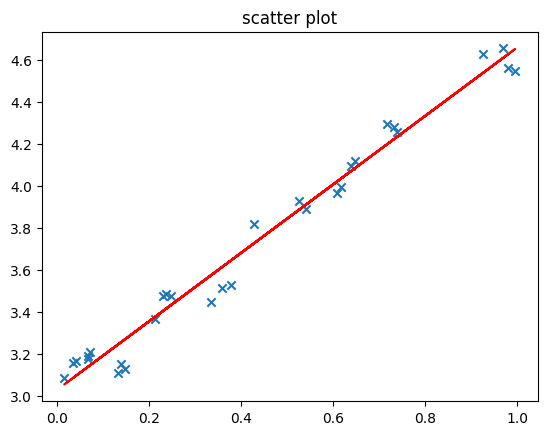

In [ ]:
#%%

# 使用sklearn包做线性回归(复杂例子)
import numpy as np
import matplotlib.pyplot as plt
# 需要插入scikit-learn包 pip install scikit-learn
from sklearn.linear_model import LinearRegression #导入机器学习库中的线性回归模块
from sklearn.linear_model import Ridge,RidgeCV   # Ridge岭回归,RidgeCV带有广义交叉验证的岭回归
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso回归,LassoCV交叉验证实现alpha的选取，LassoLarsCV基于最小角回归交叉验证实现alpha的选取  

#一元线性回归
# 样本数据集，第一列为x，第二列为y，在x和y之间建立回归模型
data=[
    [0.067732,3.176513],[0.427810,3.816464],[0.995731,4.550095],[0.738336,4.256571],[0.981083,4.560815],
    [0.526171,3.929515],[0.378887,3.526170],[0.033859,3.156393],[0.132791,3.110301],[0.138306,3.149813],
    [0.247809,3.476346],[0.648270,4.119688],[0.731209,4.282233],[0.236833,3.486582],[0.969788,4.655492],
    [0.607492,3.965162],[0.358622,3.514900],[0.147846,3.125947],[0.637820,4.094115],[0.230372,3.476039],
    [0.070237,3.210610],[0.067154,3.190612],[0.925577,4.631504],[0.717733,4.295890],[0.015371,3.085028],
    [0.335070,3.448080],[0.040486,3.167440],[0.212575,3.364266],[0.617218,3.993482],[0.541196,3.891471]
]
dataMat = np.array(data)
X = dataMat[:,0:1]   # 变量x
y = dataMat[:,1]   #变量y

# ========线性回归========
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
# model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) sklearn1.2以上版本已移除normalize参数
# ========岭回归========
# model = Ridge(alpha=0.5)
# model = RidgeCV(alphas=[0.1, 1.0, 10.0])  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
# ========Lasso回归========  
# model = Lasso(alpha=0.01)  # 调节alpha可以实现对拟合的程度  
# model = LassoCV()  # LassoCV自动调节alpha可以实现选择最佳的alpha。  
# model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha  

model.fit(X, y)   # 回归建模
print('系数矩阵:\n',model.coef_)
print('回归模型:\n',model)

predicted = model.predict(X)

# 绘制散点图 参数：x横轴 y纵轴
plt.scatter(X, y, marker='x')
plt.plot(X, predicted,c='r')
plt.title('scatter plot')
# 显示图形
plt.show()

In [ ]:
#%%

### 10.3 经济数据回归分析(投资与GPD及汇率的关系)
#############################################
import pandas as pd
import statsmodels.formula.api as smf

# 2023年各国投资与GDP和汇率的关系
print('投资与GDP和汇率的关系,回归分析')
# 数据下载请参考 ch3.4 使用wb获取经济数据
data5 = pd.read_csv("./data/WDdata_GDP_TZ_HL_2024.csv",encoding = "gbk")
mod = smf.ols('tz ~ np.log(gdp) + hl', data5).fit()
print(mod.summary())

投资与GDP和汇率的关系,回归分析
                            OLS Regression Results                            
Dep. Variable:                     tz   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     412.7
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.15e-37
Time:                        21:11:46   Log-Likelihood:                -2482.0
No. Observations:                  68   AIC:                             4970.
Df Residuals:                      65   BIC:                             4977.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -1.4e+16   2.16e+1

               .SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09


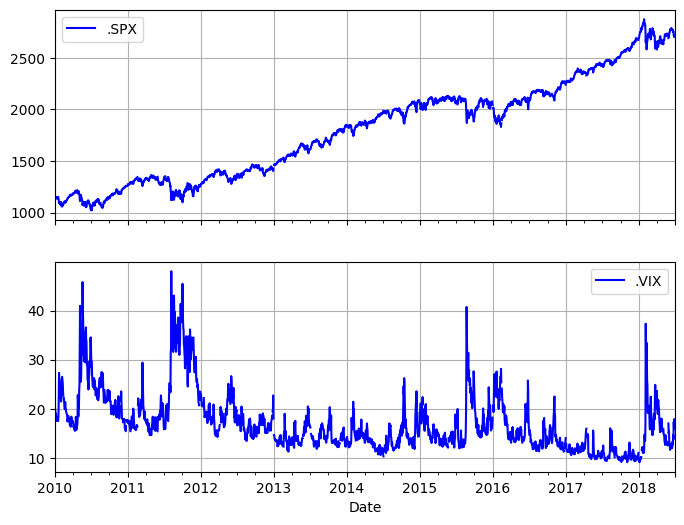

                .SPX      .VIX
Date                          
2010-01-01       NaN       NaN
2010-01-04       NaN       NaN
2010-01-05  0.003111 -0.035038
2010-01-06  0.000545 -0.009868
2010-01-07  0.003993 -0.005233


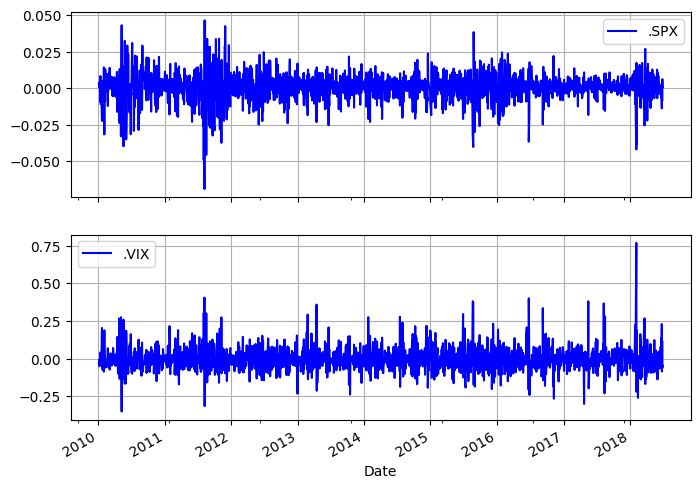

[-6.64051753e+00  1.44370407e-03]


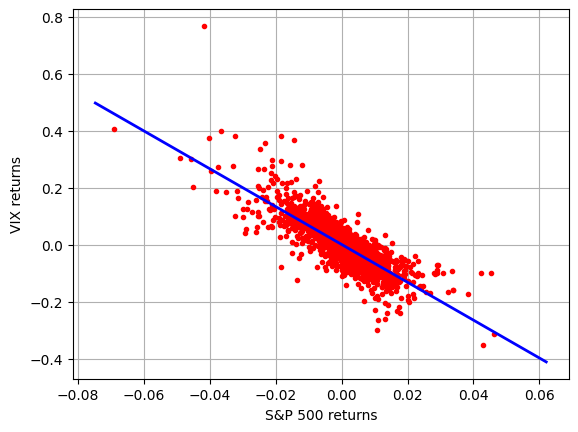

          .SPX      .VIX
.SPX  1.000000 -0.806532
.VIX -0.806532  1.000000


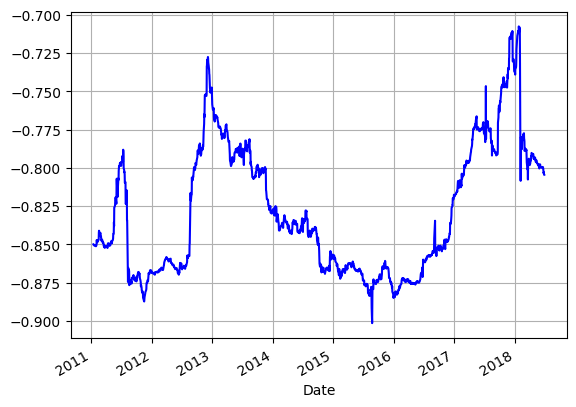

                            OLS Regression Results                            
Dep. Variable:                    vix   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3832.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:11:48   Log-Likelihood:                 3438.2
No. Observations:                2061   AIC:                            -6872.
Df Residuals:                    2059   BIC:                            -6861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      1.434      0.1

In [ ]:
#%%

### 10.4 金融数据回归分析(VIX和SPX之间的回归)
##########################################
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 使用教材上的例子数据
# data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
raw = pd.read_csv('./data/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
spx = pd.DataFrame(raw['.SPX'])
vix = pd.DataFrame(raw['.VIX'])
data4 = spx.join(vix)
print(data4.tail())
data4.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

rets = np.log(data4 / data4.shift(1)) 
print(rets.head())
rets.dropna(inplace=True)
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

xdat = rets['.SPX'].values
ydat = rets['.VIX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
print(reg)
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('VIX returns')
plt.show()

print(rets.corr())
rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(grid=True, style='b')
plt.show()

#使用ols做回归
data4a=rets
data4a.columns = ['spx', 'vix']
mod4 = smf.ols('vix ~ spx', rets).fit()
print(mod4.summary())

In [ ]:
#%%

### 10.5 Fama-French因子模型应用(资产定价与股票回测)
################################################

'''
Fama-French 三因子模型，也称为 Fama-French 回归模型，是CAMP资本资产定价模型的升级版，后面还升级为了五因子模型。。
该模型是由 Eugene Fama 和 Kenneth French 于 1993 年提出来描述股票收益的, 是量化中最经典的模型之一，最早提出是在论文《Common risk factors in the returns on stocks and bonds》中。
具体三因子模型数学表述如下：
R = α + βm MKT + βs SMB + βh HML 
其中:SMB为规模因子，HML为价值因子（账面市值比因子），MKT为市场因子。
MKT 是市场的超额回报。这是在美国注册并在纽约证券交易所内，美国证券交易所或者纳斯达克上市的所有 CRSP 公司的价值加权回报减去一个月的国债收益率；
SMB（Small Minus Big）衡量市值较小的股票的超额回报，而不是市值较大的股票；
HML（High Minus Low）衡量价值股超过成长股的超额收益。价值股票的成交价格比（B/P）高于成长股。

Fama-French 5因子模型包含另外两个因素：
RMW（Robust Minus Weak）盈利能力因子，衡量营业利润率较高的公司的超额回报，而不是利润较低的公司；
CMA（Conservative Minus Aggressive）投资因子，衡量的是公司投资的超额回报低于哪些投资更能多的公司。

数据集：
Fama-French 系列因子数据集分为三因子、五因子等版本。适合用于验证因子对股票收益的解释力，国内适配版（商用）可通过金融研究平台获取，支持 Stata、Python 等工具读取。
以下为本人实测的两个可免费使用的数据源：

达特茅斯学院的五因子数据集通常指的是 Fama-French 五因子模型数据集。该数据集由达特茅斯学院 (https://home.dartmouth.edu) 塔克商学院的肯・弗伦奇（Ken French）教授提供，是金融领域用于资产定价研究的重要数据资源。
Fama-French 五因子模型在 1993 年提出的三因子模型基础上，于 2013 年进一步扩展而来，新增了投资因子 CMA 与盈利因子 RMW。达特茅斯学院的 Fama-French 五因子数据集可从Ken French 的个人网站获取。数据集包含市场因子（MKT）、规模因子（SMB）、价值因子（HML）、盈利能力因子（RMW）和投资因子（CMA）等数据。数据包为csv格式，提供1963年7月到2022年8月的数据，可供对比研究。
[https://link.wtturl.cn/?target=https%3A%2F%2Fmba.tuck.dartmouth.edu%2Fpages%2Ffaculty%2Fken.french%2Fftp%2FF-F_Research_Data_5_Factors_2x3_daily.CSV]

央财因子数据集：
中央财经大学金融学院的下载专区 可免费下载五因子数据（会定期更新，原始数据来源于国泰安数据库）。
[https://sf.cufe.edu.cn/kydt/kyjg/zgzcglyjzx/xzzq.htm]
变量名称说明:
trdyr trdwk trdmn trddy [交易日期]
mkt_rf [市场风险因子](rf是[无风险利率])
smb [规模风险因子]
hml [账面市值比风险因子]    
umd [惯性因子]
rmw [盈利能力因子](更高盈利能力的公司通常预示更健康的财务状况和更低的风险)
cma [投资模式因子](更保守的投资策略通常与较低的风险相关联)
rf [无风险利率]
smb_equal [（等权重）规模风险因子]
hml_equal [（等权重）账面市值比风险因子]
umd_equal [（等权重）惯性因子]
rmw_equal [(等权重）盈利能力因子]
cma_equal [（等权重）投资模式因子]
'''

# 导入所需的库
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf #导入统计模型包

In [ ]:
#%%

# 获取某支股票的日收益率

# # 以000630.SZ 铜陵有色为例
# from functions_stock import get_stock_data_ts
# stock_data = get_stock_data_ts('000630.SZ','20241001','20251031')
# outfile = './data/stockdata_000630sz_20241001-20251031.csv'
# stock_data.to_csv(outfile)
# print(stock_data.head())

# 从csv读取股票数据
stock=pd.read_csv('./data/stockdata_000630sz_20241001-20251031.csv',index_col=0, parse_dates=True)
# stock=stock.loc['2024-10-01':'2025-10-31',:]
# stock.index=pd.to_datetime(stock.index)

# 计算收益率，对数收益率
from functions_stock import daily_return_ratio, daily_return_ratio_log
# stock['returns'] = stock['close'].pct_change() 
# stock['log_returns'] = np.log(1 + stock['returns'])
# stock['log_returns'] = np.log(stock['close'] / stock['close'].shift(1))
stock['returns'] = daily_return_ratio(stock['Close'])
stock['log_returns'] = daily_return_ratio_log(stock['Close'])
# stock.dropna(inplace=True)
print(stock.head(3))
print(stock.tail(3))

            Close  High   Low  Open      Volume   returns  log_returns
Date                                                                  
2024-10-08   3.88  4.25  3.67  4.23  6870092.87       NaN          NaN
2024-10-09   3.51  3.77  3.49  3.77  4476082.81 -0.095361    -0.100219
2024-10-10   3.60  3.71  3.48  3.52  3151472.64  0.025641     0.025318
            Close  High   Low  Open      Volume   returns  log_returns
Date                                                                  
2025-10-29   5.54  5.54  5.30  5.37  4851526.38  0.051233     0.049964
2025-10-30   5.52  5.66  5.44  5.48  3924095.02 -0.003610    -0.003617
2025-10-31   5.29  5.53  5.27  5.47  3931207.31 -0.041667    -0.042560


In [ ]:
#%%

# 计算一些常用量化指标(可用于与三因子模型对比，参考)，并将结果存入stock_result字典

from functions_stock import sum_return_ratio, MaxDrawdown, sharpe_ratio, Information_Ratio, Treynor_Ratio

stock_result = {"name":"铜陵有色", "code":"000630.SZ"}

stock_result['sum_return_ratio'] = sum_return_ratio(stock['Close'])
stock_result['MaxDrawdown'] = MaxDrawdown(stock['Close'])
stock_result['sharpe_ratio'] = sharpe_ratio(stock['Close'])
stock_result['Information_Ratio'] = Information_Ratio(stock['Close'])
stock_result['Treynor_Ratio'] = Treynor_Ratio(stock['Close'],beta=1)

print(stock_result)

{'name': '铜陵有色', 'code': '000630.SZ', 'sum_return_ratio': np.float64(0.36340206185567014), 'MaxDrawdown': np.float64(0.23969072164948446), 'sharpe_ratio': np.float64(-0.00018606714130563022), 'Information_Ratio': np.float64(14.270386513326411), 'Treynor_Ratio': np.float64(0.0014494127877521805)}


In [ ]:
#%%

# 使用因子数据做回归分析(OLS)

# 读取因子数据
three_factors=pd.read_csv('./data/F-F_5_Factors_daily_CUFE.csv')[['trddy','mkt_rf','smb','hml','rmw','cma']].rename(columns={'trddy':'Date'}).set_index('Date')
three_factors=three_factors.loc['2024-10-01':'2025-10-31',:]
three_factors.index=pd.to_datetime(three_factors.index)
print(three_factors.head())
print(three_factors.tail())

# 合并股票数据与因子数据
rets = pd.merge(stock[['returns','log_returns']], three_factors, left_index=True, right_index=True)
rets.dropna(inplace=True)

# 使用五因子做回归分析
mod4 = smf.ols('returns ~ mkt_rf + smb + hml + rmw + cma', rets).fit(cov_type="HAC", cov_kwds={"maxlags": 3})
# mod4 = smf.ols('log_returns ~ mkt_rf + smb + hml + rmw + cma', rets).fit(cov_type="HAC", cov_kwds={"maxlags": 3})

# 思考，使用简单收益率与使用对数收益率的区别及适用的场景？
# 简单收益率：直接计算日收益率，不考虑时间衰减。适用于短期分析，如计算策略的日收益率。
# 对数收益率：计算日收益率的自然对数，考虑时间衰减。适用于长期分析，如计算策略的年化收益率。
print(mod4.summary())

# 将回归结果中的系数存入stock_result字典
betas = mod4.params
stock_result['alpha'] = betas['Intercept']
stock_result['mkt'] = betas['mkt_rf']
stock_result['smb'] = betas['smb']
stock_result['hml'] = betas['hml'] 
stock_result['rmw'] = betas['rmw']
stock_result['cma'] = betas['cma']

# 输出结果
print(stock_result)
print("\n结果汇总如下：")
for k,v in stock_result.items():
    if isinstance(v, (float, np.floating)):
        print(f'{k:18} : {v:.4f}')
    else:
        print(f'{k:18} : {v}')    

              mkt_rf       smb       hml       rmw       cma
Date                                                        
2024-10-08  0.052454  0.020356 -0.041206 -0.011257 -0.007186
2024-10-09 -0.077365 -0.018055  0.005491  0.000599 -0.001939
2024-10-10  0.010232 -0.006675  0.017603  0.013279 -0.002826
2024-10-11 -0.032238 -0.001459  0.011822  0.001064  0.002802
2024-10-14  0.022142  0.011602 -0.006742 -0.009298  0.009181
              mkt_rf       smb       hml       rmw       cma
Date                                                        
2025-10-27  0.012733 -0.007324 -0.001615  0.006615 -0.010515
2025-10-28 -0.002817  0.007641 -0.003815 -0.007379  0.003007
2025-10-29  0.013031 -0.018816  0.000856  0.007014 -0.011723
2025-10-30 -0.008982 -0.002663  0.007209 -0.004074  0.005502
2025-10-31 -0.005584  0.020695  0.001694 -0.018548  0.023782
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                 

In [ ]:
#%%

# 多支股票的F-F因子回归

# 详细请参考 proc_FF_reg.py 文件
from functions_ffreg import analyze
code_name={
            "600100.SH": "同方股份",
            "600626.SH": "申达股份",
            "000630.SZ": "铜陵有色",
            "000850.SZ": "华茂股份",
            "600368.SH": "五洲交通",
            "603766.SH": "隆鑫通用",
            "600105.SH": "永鼎股份",
            "600603.SH": "广汇物流",
            "002344.SZ": "海宁皮城",
            "000407.SZ": "胜利股份",
            "000883.SZ": "湖北能源"
            }
r_ = analyze(
    codes=code_name,
    start_date='2024-10-01', end_date='2025-10-31', 
    mode=5)
# print(r_)
outfile = './data/FFReg_2025.csv'
r_.to_csv(outfile)
print(f'\n结果已保存至{outfile}')

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600100.SH', '实际总收益率': np.float64(0.24746744948010257), '最大回测率': np.float64(0.2848100699160002), '夏普比率': np.float64(-0.00034106000418986505), '信息比率': np.float64(8.765935301527115), '特雷诺比率': np.float64(0.0011615025450098357), '阿尔法(alpha)': np.float64(0.00019020417381214157), '市场因子MKT': np.float64(0.8564011476019929), '规模因子SMB': np.float64(-0.9408006071552661), '价值因子HML': np.float64(-0.7968552075621144), '盈利能力因子RMW': np.float64(-2.137994102963374), '投资模式因子CMA': np.float64(-0.43378538858669224), '股票名称': '同方股份'}
股票同方股份(600100.SH)处理完成:{'股票代码': '600100.SH', '实际总收益率': np.float64(0.24746744948010257), '最大回测率': np.float64(0.2848100699160002), '夏普比率': np.float64(-0.00034106000418986505), '信息比率': np.float64(8.765935301527115), '特雷诺比率': np.float64(0.0011615025450098357), '阿尔法(alpha)': np.float64(0.00019020417381214157), '市场因子MKT': np.float64(0.8564011476019929), '规模因子SMB': np.float64(-0.9408006071552661), '价值因子HML': np.float64(-0.7968552075621144), '盈利能力因子RMW': np.float64(-2.1379941029633

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600626.SH', '实际总收益率': np.float64(0.34848487402708966), '最大回测率': np.float64(0.3479166687362723), '夏普比率': np.float64(0.0003337044187682271), '信息比率': np.float64(10.66244291034027), '特雷诺比率': np.float64(0.0016013588714199724), '阿尔法(alpha)': np.float64(0.0008604560710868244), '市场因子MKT': np.float64(1.0379926653021418), '规模因子SMB': np.float64(0.9456669886668582), '价值因子HML': np.float64(0.09291845911282312), '盈利能力因子RMW': np.float64(0.3902500408212312), '投资模式因子CMA': np.float64(1.1481631565093111), '股票名称': '申达股份'}
股票申达股份(600626.SH)处理完成:{'股票代码': '600626.SH', '实际总收益率': np.float64(0.34848487402708966), '最大回测率': np.float64(0.3479166687362723), '夏普比率': np.float64(0.0003337044187682271), '信息比率': np.float64(10.66244291034027), '特雷诺比率': np.float64(0.0016013588714199724), '阿尔法(alpha)': np.float64(0.0008604560710868244), '市场因子MKT': np.float64(1.0379926653021418), '规模因子SMB': np.float64(0.9456669886668582), '价值因子HML': np.float64(0.09291845911282312), '盈利能力因子RMW': np.float64(0.3902500408212312), '投资模式

[*********************100%***********************]  1 of 1 completed


{'股票代码': '000630.SZ', '实际总收益率': np.float64(0.4678447837378333), '最大回测率': np.float64(0.2396907923142659), '夏普比率': np.float64(8.802316224835387e-05), '信息比率': np.float64(18.67903379456323), '特雷诺比率': np.float64(0.001735219421981816), '阿尔法(alpha)': np.float64(0.0010378921022343604), '市场因子MKT': np.float64(1.5906443286810907), '规模因子SMB': np.float64(-0.530170288451894), '价值因子HML': np.float64(0.9215550502531645), '盈利能力因子RMW': np.float64(-0.20030532434468418), '投资模式因子CMA': np.float64(-0.3025759396621528), '股票名称': '铜陵有色'}
股票铜陵有色(000630.SZ)处理完成:{'股票代码': '000630.SZ', '实际总收益率': np.float64(0.4678447837378333), '最大回测率': np.float64(0.2396907923142659), '夏普比率': np.float64(8.802316224835387e-05), '信息比率': np.float64(18.67903379456323), '特雷诺比率': np.float64(0.001735219421981816), '阿尔法(alpha)': np.float64(0.0010378921022343604), '市场因子MKT': np.float64(1.5906443286810907), '规模因子SMB': np.float64(-0.530170288451894), '价值因子HML': np.float64(0.9215550502531645), '盈利能力因子RMW': np.float64(-0.20030532434468418), '投资模式因

[*********************100%***********************]  1 of 1 completed


{'股票代码': '000850.SZ', '实际总收益率': np.float64(-0.016404977430569626), '最大回测率': np.float64(0.3029126294425234), '夏普比率': np.float64(-0.0014704806702844722), '信息比率': np.float64(-1.3061905479579399), '特雷诺比率': np.float64(0.00018631436365585394), '阿尔法(alpha)': np.float64(-0.000851705042740026), '市场因子MKT': np.float64(0.7497585358525077), '规模因子SMB': np.float64(0.6074903522451323), '价值因子HML': np.float64(0.3951428483019566), '盈利能力因子RMW': np.float64(-0.3587754119709807), '投资模式因子CMA': np.float64(-0.3745956280247173), '股票名称': '华茂股份'}
股票华茂股份(000850.SZ)处理完成:{'股票代码': '000850.SZ', '实际总收益率': np.float64(-0.016404977430569626), '最大回测率': np.float64(0.3029126294425234), '夏普比率': np.float64(-0.0014704806702844722), '信息比率': np.float64(-1.3061905479579399), '特雷诺比率': np.float64(0.00018631436365585394), '阿尔法(alpha)': np.float64(-0.000851705042740026), '市场因子MKT': np.float64(0.7497585358525077), '规模因子SMB': np.float64(0.6074903522451323), '价值因子HML': np.float64(0.3951428483019566), '盈利能力因子RMW': np.float64(-0.35877541197

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600368.SH', '实际总收益率': np.float64(0.10967738240572472), '最大回测率': np.float64(0.268421003589338), '夏普比率': np.float64(-0.0009686557613894143), '信息比率': np.float64(3.857855292753973), '特雷诺比率': np.float64(0.0006591196861494494), '阿尔法(alpha)': np.float64(0.0003151262205058065), '市场因子MKT': np.float64(0.8258497128933432), '规模因子SMB': np.float64(-0.27211934236520996), '价值因子HML': np.float64(0.8601251197715424), '盈利能力因子RMW': np.float64(-0.4242669313845795), '投资模式因子CMA': np.float64(0.11357298579932248), '股票名称': '五洲交通'}
股票五洲交通(600368.SH)处理完成:{'股票代码': '600368.SH', '实际总收益率': np.float64(0.10967738240572472), '最大回测率': np.float64(0.268421003589338), '夏普比率': np.float64(-0.0009686557613894143), '信息比率': np.float64(3.857855292753973), '特雷诺比率': np.float64(0.0006591196861494494), '阿尔法(alpha)': np.float64(0.0003151262205058065), '市场因子MKT': np.float64(0.8258497128933432), '规模因子SMB': np.float64(-0.27211934236520996), '价值因子HML': np.float64(0.8601251197715424), '盈利能力因子RMW': np.float64(-0.4242669313845795), 

[*********************100%***********************]  1 of 1 completed


{'股票代码': '603766.SH', '实际总收益率': np.float64(0.6463096567926618), '最大回测率': np.float64(0.18596792111694044), '夏普比率': np.float64(0.0008429814492898016), '信息比率': np.float64(22.66102171820337), '特雷诺比率': np.float64(0.0022710227657952472), '阿尔法(alpha)': np.float64(0.0008745714620179963), '市场因子MKT': np.float64(0.9019105549484752), '规模因子SMB': np.float64(0.39494367407833153), '价值因子HML': np.float64(0.15990717440957916), '盈利能力因子RMW': np.float64(-0.5627797443230657), '投资模式因子CMA': np.float64(-1.360654397839203), '股票名称': '隆鑫通用'}
股票隆鑫通用(603766.SH)处理完成:{'股票代码': '603766.SH', '实际总收益率': np.float64(0.6463096567926618), '最大回测率': np.float64(0.18596792111694044), '夏普比率': np.float64(0.0008429814492898016), '信息比率': np.float64(22.66102171820337), '特雷诺比率': np.float64(0.0022710227657952472), '阿尔法(alpha)': np.float64(0.0008745714620179963), '市场因子MKT': np.float64(0.9019105549484752), '规模因子SMB': np.float64(0.39494367407833153), '价值因子HML': np.float64(0.15990717440957916), '盈利能力因子RMW': np.float64(-0.5627797443230657), '

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600105.SH', '实际总收益率': np.float64(2.2123111211238595), '最大回测率': np.float64(0.32732728007167594), '夏普比率': np.float64(0.004375169858978772), '信息比率': np.float64(53.129001863866264), '特雷诺比率': np.float64(0.005323632028640661), '阿尔法(alpha)': np.float64(0.002771649323394472), '市场因子MKT': np.float64(0.9840179779797286), '规模因子SMB': np.float64(1.2018352192864419), '价值因子HML': np.float64(0.11690706344575494), '盈利能力因子RMW': np.float64(-1.3745778298093745), '投资模式因子CMA': np.float64(-2.2368907839438674), '股票名称': '永鼎股份'}
股票永鼎股份(600105.SH)处理完成:{'股票代码': '600105.SH', '实际总收益率': np.float64(2.2123111211238595), '最大回测率': np.float64(0.32732728007167594), '夏普比率': np.float64(0.004375169858978772), '信息比率': np.float64(53.129001863866264), '特雷诺比率': np.float64(0.005323632028640661), '阿尔法(alpha)': np.float64(0.002771649323394472), '市场因子MKT': np.float64(0.9840179779797286), '规模因子SMB': np.float64(1.2018352192864419), '价值因子HML': np.float64(0.11690706344575494), '盈利能力因子RMW': np.float64(-1.3745778298093745), '投资模式因

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600603.SH', '实际总收益率': np.float64(0.4010695091713803), '最大回测率': np.float64(0.41237114000993536), '夏普比率': np.float64(-1.2825274190824939e-05), '信息比率': np.float64(15.376603138612921), '特雷诺比率': np.float64(0.0015763173742487497), '阿尔法(alpha)': np.float64(0.0018068912992051198), '市场因子MKT': np.float64(0.6475269822555616), '规模因子SMB': np.float64(0.6934383507361681), '价值因子HML': np.float64(0.1276080509536051), '盈利能力因子RMW': np.float64(1.4950814329723414), '投资模式因子CMA': np.float64(1.5483258984954067), '股票名称': '广汇物流'}
股票广汇物流(600603.SH)处理完成:{'股票代码': '600603.SH', '实际总收益率': np.float64(0.4010695091713803), '最大回测率': np.float64(0.41237114000993536), '夏普比率': np.float64(-1.2825274190824939e-05), '信息比率': np.float64(15.376603138612921), '特雷诺比率': np.float64(0.0015763173742487497), '阿尔法(alpha)': np.float64(0.0018068912992051198), '市场因子MKT': np.float64(0.6475269822555616), '规模因子SMB': np.float64(0.6934383507361681), '价值因子HML': np.float64(0.1276080509536051), '盈利能力因子RMW': np.float64(1.4950814329723414), '

[*********************100%***********************]  1 of 1 completed


{'股票代码': '002344.SZ', '实际总收益率': np.float64(0.15022608100644103), '最大回测率': np.float64(0.4318181818181818), '夏普比率': np.float64(-0.0005611752488713176), '信息比率': np.float64(4.898502048928933), '特雷诺比率': np.float64(0.0008810077798836577), '阿尔法(alpha)': np.float64(-0.00037815611158204687), '市场因子MKT': np.float64(1.0881272561818995), '规模因子SMB': np.float64(0.7762711959285413), '价值因子HML': np.float64(1.225127382226504), '盈利能力因子RMW': np.float64(-0.38084946306295325), '投资模式因子CMA': np.float64(-0.33205996597096277), '股票名称': '海宁皮城'}
股票海宁皮城(002344.SZ)处理完成:{'股票代码': '002344.SZ', '实际总收益率': np.float64(0.15022608100644103), '最大回测率': np.float64(0.4318181818181818), '夏普比率': np.float64(-0.0005611752488713176), '信息比率': np.float64(4.898502048928933), '特雷诺比率': np.float64(0.0008810077798836577), '阿尔法(alpha)': np.float64(-0.00037815611158204687), '市场因子MKT': np.float64(1.0881272561818995), '规模因子SMB': np.float64(0.7762711959285413), '价值因子HML': np.float64(1.225127382226504), '盈利能力因子RMW': np.float64(-0.38084946306295325

[*********************100%***********************]  1 of 1 completed


{'股票代码': '000407.SZ', '实际总收益率': np.float64(0.13902914395806162), '最大回测率': np.float64(0.2390746046853822), '夏普比率': np.float64(-0.0014219558878751648), '信息比率': np.float64(6.403111061457937), '特雷诺比率': np.float64(0.0006509303300698813), '阿尔法(alpha)': np.float64(-0.00027954323224182586), '市场因子MKT': np.float64(1.0577593142470414), '规模因子SMB': np.float64(0.8734843494037345), '价值因子HML': np.float64(1.08409241544845), '盈利能力因子RMW': np.float64(0.2798513283927813), '投资模式因子CMA': np.float64(0.1109104316411271), '股票名称': '胜利股份'}
股票胜利股份(000407.SZ)处理完成:{'股票代码': '000407.SZ', '实际总收益率': np.float64(0.13902914395806162), '最大回测率': np.float64(0.2390746046853822), '夏普比率': np.float64(-0.0014219558878751648), '信息比率': np.float64(6.403111061457937), '特雷诺比率': np.float64(0.0006509303300698813), '阿尔法(alpha)': np.float64(-0.00027954323224182586), '市场因子MKT': np.float64(1.0577593142470414), '规模因子SMB': np.float64(0.8734843494037345), '价值因子HML': np.float64(1.08409241544845), '盈利能力因子RMW': np.float64(0.2798513283927813), '投资模式

[*********************100%***********************]  1 of 1 completed

{'股票代码': '000883.SZ', '实际总收益率': np.float64(-0.06406161480811079), '最大回测率': np.float64(0.14285722140631452), '夏普比率': np.float64(-0.00362602374370259), '信息比率': np.float64(-6.656382117779108), '特雷诺比率': np.float64(-0.00022517013721333294), '阿尔法(alpha)': np.float64(-0.0006025173645652385), '市场因子MKT': np.float64(0.8507486274938963), '规模因子SMB': np.float64(-0.004510316769209464), '价值因子HML': np.float64(0.8885042571537176), '盈利能力因子RMW': np.float64(0.062027515620559893), '投资模式因子CMA': np.float64(-0.020417700670721323), '股票名称': '湖北能源'}
股票湖北能源(000883.SZ)处理完成:{'股票代码': '000883.SZ', '实际总收益率': np.float64(-0.06406161480811079), '最大回测率': np.float64(0.14285722140631452), '夏普比率': np.float64(-0.00362602374370259), '信息比率': np.float64(-6.656382117779108), '特雷诺比率': np.float64(-0.00022517013721333294), '阿尔法(alpha)': np.float64(-0.0006025173645652385), '市场因子MKT': np.float64(0.8507486274938963), '规模因子SMB': np.float64(-0.004510316769209464), '价值因子HML': np.float64(0.8885042571537176), '盈利能力因子RMW': np.float64(0.06202

In [ ]:
#%%

#############END################

In [ ]:
#%%

### ch10. 回归分析(statsmodels和scikit_learn包)
################################################

# 10.1 回归分析(使用statmodels包)
# 10.2 回归分析(使用scikit_learn包)
# 10.3 经济数据回归分析示例(投资与GPD及汇率的关系)
# 10.4 金融数据回归分析示例(VIX与SPX指数之间的回归)
# 10.5 Fama-French因子模型应用(资产定价与股票回测)

In [ ]:
#%%

# 导入需要的包
# 使用pip安装包: pip install scikit_learn statsmodels

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf  # 导入统计模型包，适合用公式法进行回归分析，尤其适合快速建模和数据框（DataFrame）数据
import statsmodels.api as sm  # 导入统计模型包，与smf相比，更灵活，支持更多的回归模型

from sklearn.linear_model import LinearRegression # 导入机器学习库中的线性回归模块
from sklearn.linear_model import Ridge,RidgeCV   # Ridge岭回归, RidgeCV带有广义交叉验证的岭回归
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso回归, LassoCV交叉验证实现alpha的选取，LassoLarsCV基于最小角回归交叉验证实现alpha的选取

'''
经济数据与金融数据的回归分析
1. 使用scikit-learn包 官网 https://scikit-learn.org/
    model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    model.fit(X, y) 
2. 使用statsmodels包 
    mod = smf.ols('y ~ x1 + x2', data).fit()
    mod = sm.OLS(y, sm.add_constant(X)).fit()
'''
print("准备好了, start...")

准备好了, start...


In [ ]:
#%%

### 10.1 回归分析(使用statmodels包)
##################################

import pandas as pd
# 数据准备
data3=pd.DataFrame({'square_feet':[150,200,230,255,260,340,700,720,790,850,900,950,1000],
                    'price':[5450,6850,8750,9650,10450,13450,16450,16930,17200,17943,18320,18412,18900],
                    'bedrooms':[2,2,3,4,4,5,6,6,6,7,7,8,9]})

# 使用statmodels的ols做回归分析
import statsmodels.formula.api as smf
# data = pd.DataFrame(...)  # 假设已经有数据框 data，包含变量 y, x1, x2
# formula = "y ~ x1 + x2"  # 基本公式
# formula_no_const = "y ~ x1 + x2 - 1"  # 移除常数项
# formula_interact = "y ~ x1 + x2 + x1*x2"  # 添加交互项
# mod = smf.ols(formula, data).fit()

# mod = smf.ols('price ~ square_feet + bedrooms', data3).fit()
mod = smf.ols('price ~ square_feet + bedrooms', data3).fit(cov_type="HAC", cov_kwds={"maxlags": 3}, small_samle=True)
'''
采用 Newey-West HAC 稳健标准误，滞后 3 期，无小样本校正是一般金融数据OLS的标准操作，表明考虑了自相关和异方差。
滞后阶数：3 lags 适合日度数据，若数据频率或自相关特性不同，需调整（如周度用 2 lags，月度用 1 lag）；
小样本校正：样本量 < 50 时，建议开启校正（small_sample=True），大样本可忽略；
'''
print(mod.summary())
'''
输出结果的解读
1. 回归系数：Intercept 为截距项，square_feet 为房屋面积系数，bedrooms 为卧室数量系数。
2. 标准误差：表示系数的估计值的不确定性，越小越可靠。
3. t 值：系数的 t 统计量，用于检验系数是否显著不同于零。
4. P>|t|：t 值对应的 p 值，用于判断系数是否显著不同于零。
5. [0.025 0.975]：95% 置信区间，用于估计系数的真实值的范围。
'''

# 提取回归系数
beta = mod.params
print(f'\n回归系数：\n{beta}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     91.40
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           3.75e-07
Time:                        21:12:23   Log-Likelihood:                -109.39
No. Observations:                  13   AIC:                             224.8
Df Residuals:                      10   BIC:                             226.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3856.6405   1464.915      2.633      

In [ ]:
#%%

# 使用statsmodels.api
# 与smf相比，更灵活，sm支持更多的回归模型, 但不如smf方便 
import statsmodels.api as sm
# mod = sm.OLS(y, sm.add_constant(X)).fit()
mod = sm.OLS(data3['price'], sm.add_constant(data3[['square_feet','bedrooms']])).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     86.98
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           4.75e-07
Time:                        21:12:23   Log-Likelihood:                -109.39
No. Observations:                  13   AIC:                             224.8
Df Residuals:                      10   BIC:                             226.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3856.6405   1143.321      3.373      

In [ ]:
#%%

### 10.2 回归分析(使用scikit_learn包)
####################################

# 使用sklearn包做线性回归(简单例子)
import numpy as np
from sklearn.linear_model import LinearRegression

# 例子：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
data_X=np.array(data3[['square_feet','bedrooms']]).reshape(len(data3),2) 
# 不管什么方法将list或DataFrame或Series转化成矩阵就行
data_y=np.array(data3['price']).reshape(len(data3),1)

regr=LinearRegression() #创建线性回归模型，参数默认
regr.fit(data_X, data_y)#拟合数据，square_feet将房屋面积作为x,price价格作为y；也可以理解用面积去预测价格
print(regr.coef_)
a=regr.predict([[268.5,3]])#预测多增加一个卧室数量3
print(a)

[[   7.3758843  1078.88121192]]
[[9073.70904534]]


系数矩阵:
 [1.6314263]
回归模型:
 LinearRegression(n_jobs=1)


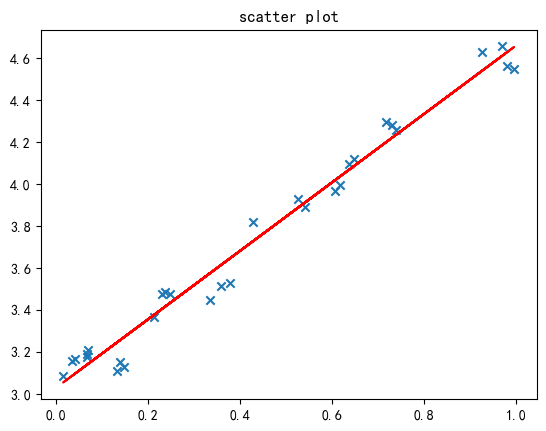

In [ ]:
#%%

# 使用sklearn包做线性回归(复杂例子)
import numpy as np
import matplotlib.pyplot as plt
# 需要插入scikit-learn包 pip install scikit-learn
from sklearn.linear_model import LinearRegression #导入机器学习库中的线性回归模块
from sklearn.linear_model import Ridge,RidgeCV   # Ridge岭回归,RidgeCV带有广义交叉验证的岭回归
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso回归,LassoCV交叉验证实现alpha的选取，LassoLarsCV基于最小角回归交叉验证实现alpha的选取  

#一元线性回归
# 样本数据集，第一列为x，第二列为y，在x和y之间建立回归模型
data=[
    [0.067732,3.176513],[0.427810,3.816464],[0.995731,4.550095],[0.738336,4.256571],[0.981083,4.560815],
    [0.526171,3.929515],[0.378887,3.526170],[0.033859,3.156393],[0.132791,3.110301],[0.138306,3.149813],
    [0.247809,3.476346],[0.648270,4.119688],[0.731209,4.282233],[0.236833,3.486582],[0.969788,4.655492],
    [0.607492,3.965162],[0.358622,3.514900],[0.147846,3.125947],[0.637820,4.094115],[0.230372,3.476039],
    [0.070237,3.210610],[0.067154,3.190612],[0.925577,4.631504],[0.717733,4.295890],[0.015371,3.085028],
    [0.335070,3.448080],[0.040486,3.167440],[0.212575,3.364266],[0.617218,3.993482],[0.541196,3.891471]
]
dataMat = np.array(data)
X = dataMat[:,0:1]   # 变量x
y = dataMat[:,1]   #变量y

# ========线性回归========
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
# model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) sklearn1.2以上版本已移除normalize参数
# ========岭回归========
# model = Ridge(alpha=0.5)
# model = RidgeCV(alphas=[0.1, 1.0, 10.0])  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
# ========Lasso回归========  
# model = Lasso(alpha=0.01)  # 调节alpha可以实现对拟合的程度  
# model = LassoCV()  # LassoCV自动调节alpha可以实现选择最佳的alpha。  
# model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha  

model.fit(X, y)   # 回归建模
print('系数矩阵:\n',model.coef_)
print('回归模型:\n',model)

predicted = model.predict(X)

# 绘制散点图 参数：x横轴 y纵轴
plt.scatter(X, y, marker='x')
plt.plot(X, predicted,c='r')
plt.title('scatter plot')
# 显示图形
plt.show()

In [ ]:
#%%

### 10.3 经济数据回归分析(投资与GPD及汇率的关系)
#############################################
import pandas as pd
import statsmodels.formula.api as smf

# 2023年各国投资与GDP和汇率的关系
print('投资与GDP和汇率的关系,回归分析')
# 数据下载请参考 ch3.4 使用wb获取经济数据
data5 = pd.read_csv("./data/WDdata_GDP_TZ_HL_2024.csv",encoding = "gbk")
mod = smf.ols('tz ~ np.log(gdp) + hl', data5).fit()
print(mod.summary())

投资与GDP和汇率的关系,回归分析
                            OLS Regression Results                            
Dep. Variable:                     tz   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     412.7
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.15e-37
Time:                        21:12:23   Log-Likelihood:                -2482.0
No. Observations:                  68   AIC:                             4970.
Df Residuals:                      65   BIC:                             4977.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -1.4e+16   2.16e+1

               .SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09


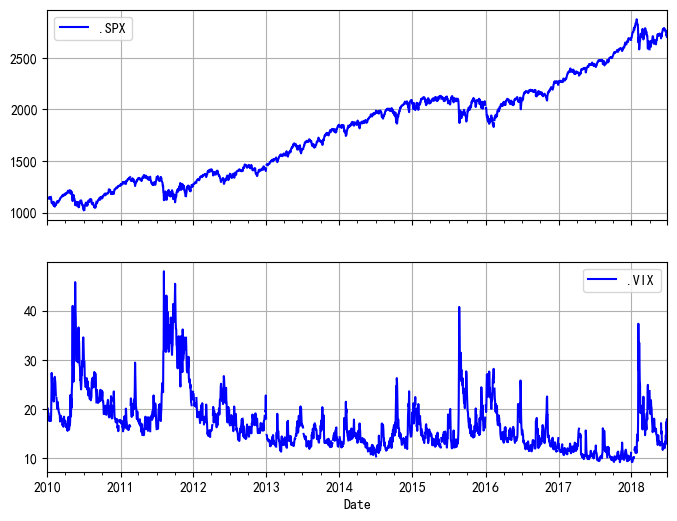

                .SPX      .VIX
Date                          
2010-01-01       NaN       NaN
2010-01-04       NaN       NaN
2010-01-05  0.003111 -0.035038
2010-01-06  0.000545 -0.009868
2010-01-07  0.003993 -0.005233


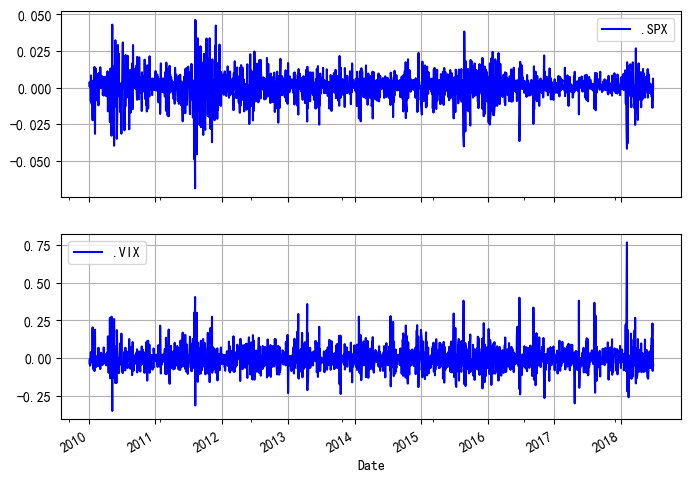

[-6.64051753e+00  1.44370407e-03]


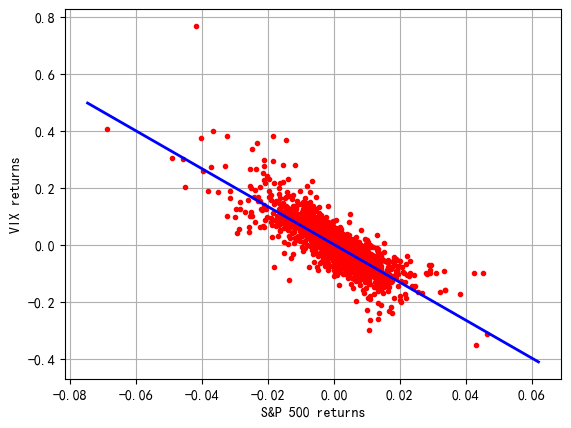

          .SPX      .VIX
.SPX  1.000000 -0.806532
.VIX -0.806532  1.000000


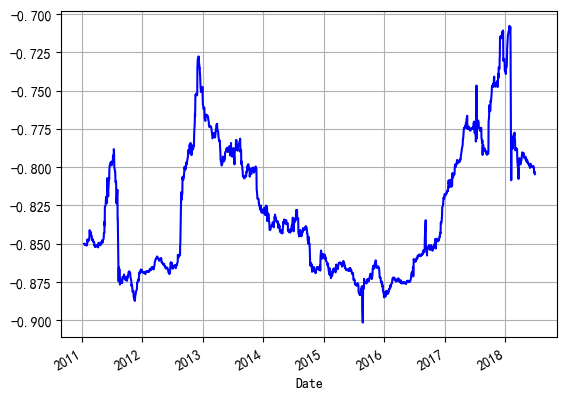

                            OLS Regression Results                            
Dep. Variable:                    vix   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3832.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:12:25   Log-Likelihood:                 3438.2
No. Observations:                2061   AIC:                            -6872.
Df Residuals:                    2059   BIC:                            -6861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      1.434      0.1

In [ ]:
#%%

### 10.4 金融数据回归分析(VIX和SPX之间的回归)
##########################################
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 使用教材上的例子数据
# data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
raw = pd.read_csv('./data/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
spx = pd.DataFrame(raw['.SPX'])
vix = pd.DataFrame(raw['.VIX'])
data4 = spx.join(vix)
print(data4.tail())
data4.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

rets = np.log(data4 / data4.shift(1)) 
print(rets.head())
rets.dropna(inplace=True)
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

xdat = rets['.SPX'].values
ydat = rets['.VIX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
print(reg)
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('VIX returns')
plt.show()

print(rets.corr())
rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(grid=True, style='b')
plt.show()

#使用ols做回归
data4a=rets
data4a.columns = ['spx', 'vix']
mod4 = smf.ols('vix ~ spx', rets).fit()
print(mod4.summary())

In [ ]:
#%%

### 10.5 Fama-French因子模型应用(资产定价与股票回测)
################################################

'''
Fama-French 三因子模型，也称为 Fama-French 回归模型，是CAMP资本资产定价模型的升级版，后面还升级为了五因子模型。。
该模型是由 Eugene Fama 和 Kenneth French 于 1993 年提出来描述股票收益的, 是量化中最经典的模型之一，最早提出是在论文《Common risk factors in the returns on stocks and bonds》中。
具体三因子模型数学表述如下：
R = α + βm MKT + βs SMB + βh HML 
其中:SMB为规模因子，HML为价值因子（账面市值比因子），MKT为市场因子。
MKT 是市场的超额回报。这是在美国注册并在纽约证券交易所内，美国证券交易所或者纳斯达克上市的所有 CRSP 公司的价值加权回报减去一个月的国债收益率；
SMB（Small Minus Big）衡量市值较小的股票的超额回报，而不是市值较大的股票；
HML（High Minus Low）衡量价值股超过成长股的超额收益。价值股票的成交价格比（B/P）高于成长股。

Fama-French 5因子模型包含另外两个因素：
RMW（Robust Minus Weak）盈利能力因子，衡量营业利润率较高的公司的超额回报，而不是利润较低的公司；
CMA（Conservative Minus Aggressive）投资因子，衡量的是公司投资的超额回报低于哪些投资更能多的公司。

数据集：
Fama-French 系列因子数据集分为三因子、五因子等版本。适合用于验证因子对股票收益的解释力，国内适配版（商用）可通过金融研究平台获取，支持 Stata、Python 等工具读取。
以下为本人实测的两个可免费使用的数据源：

达特茅斯学院的五因子数据集通常指的是 Fama-French 五因子模型数据集。该数据集由达特茅斯学院 (https://home.dartmouth.edu) 塔克商学院的肯・弗伦奇（Ken French）教授提供，是金融领域用于资产定价研究的重要数据资源。
Fama-French 五因子模型在 1993 年提出的三因子模型基础上，于 2013 年进一步扩展而来，新增了投资因子 CMA 与盈利因子 RMW。达特茅斯学院的 Fama-French 五因子数据集可从Ken French 的个人网站获取。数据集包含市场因子（MKT）、规模因子（SMB）、价值因子（HML）、盈利能力因子（RMW）和投资因子（CMA）等数据。数据包为csv格式，提供1963年7月到2022年8月的数据，可供对比研究。
[https://link.wtturl.cn/?target=https%3A%2F%2Fmba.tuck.dartmouth.edu%2Fpages%2Ffaculty%2Fken.french%2Fftp%2FF-F_Research_Data_5_Factors_2x3_daily.CSV]

央财因子数据集：
中央财经大学金融学院的下载专区 可免费下载五因子数据（会定期更新，原始数据来源于国泰安数据库）。
[https://sf.cufe.edu.cn/kydt/kyjg/zgzcglyjzx/xzzq.htm]
变量名称说明:
trdyr trdwk trdmn trddy [交易日期]
mkt_rf [市场风险因子](rf是[无风险利率])
smb [规模风险因子]
hml [账面市值比风险因子]    
umd [惯性因子]
rmw [盈利能力因子](更高盈利能力的公司通常预示更健康的财务状况和更低的风险)
cma [投资模式因子](更保守的投资策略通常与较低的风险相关联)
rf [无风险利率]
smb_equal [（等权重）规模风险因子]
hml_equal [（等权重）账面市值比风险因子]
umd_equal [（等权重）惯性因子]
rmw_equal [(等权重）盈利能力因子]
cma_equal [（等权重）投资模式因子]
'''

# 导入所需的库
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf #导入统计模型包

In [ ]:
#%%

# 获取某支股票的日收益率

# # 以000630.SZ 铜陵有色为例
# from functions_stock import get_stock_data_ts
# stock_data = get_stock_data_ts('000630.SZ','20241001','20251031')
# outfile = './data/stockdata_000630sz_20241001-20251031.csv'
# stock_data.to_csv(outfile)
# print(stock_data.head())

# 从csv读取股票数据
stock=pd.read_csv('./data/stockdata_000630sz_20241001-20251031.csv',index_col=0, parse_dates=True)
# stock=stock.loc['2024-10-01':'2025-10-31',:]
# stock.index=pd.to_datetime(stock.index)

# 计算收益率，对数收益率
from functions_stock import daily_return_ratio, daily_return_ratio_log
# stock['returns'] = stock['close'].pct_change() 
# stock['log_returns'] = np.log(1 + stock['returns'])
# stock['log_returns'] = np.log(stock['close'] / stock['close'].shift(1))
stock['returns'] = daily_return_ratio(stock['Close'])
stock['log_returns'] = daily_return_ratio_log(stock['Close'])
# stock.dropna(inplace=True)
print(stock.head(3))
print(stock.tail(3))

            Close  High   Low  Open      Volume   returns  log_returns
Date                                                                  
2024-10-08   3.88  4.25  3.67  4.23  6870092.87       NaN          NaN
2024-10-09   3.51  3.77  3.49  3.77  4476082.81 -0.095361    -0.100219
2024-10-10   3.60  3.71  3.48  3.52  3151472.64  0.025641     0.025318
            Close  High   Low  Open      Volume   returns  log_returns
Date                                                                  
2025-10-29   5.54  5.54  5.30  5.37  4851526.38  0.051233     0.049964
2025-10-30   5.52  5.66  5.44  5.48  3924095.02 -0.003610    -0.003617
2025-10-31   5.29  5.53  5.27  5.47  3931207.31 -0.041667    -0.042560


In [ ]:
#%%

# 计算一些常用量化指标(可用于与三因子模型对比，参考)，并将结果存入stock_result字典

from functions_stock import sum_return_ratio, MaxDrawdown, sharpe_ratio, Information_Ratio, Treynor_Ratio

stock_result = {"name":"铜陵有色", "code":"000630.SZ"}

stock_result['sum_return_ratio'] = sum_return_ratio(stock['Close'])
stock_result['MaxDrawdown'] = MaxDrawdown(stock['Close'])
stock_result['sharpe_ratio'] = sharpe_ratio(stock['Close'])
stock_result['Information_Ratio'] = Information_Ratio(stock['Close'])
stock_result['Treynor_Ratio'] = Treynor_Ratio(stock['Close'],beta=1)

print(stock_result)

{'name': '铜陵有色', 'code': '000630.SZ', 'sum_return_ratio': np.float64(0.36340206185567014), 'MaxDrawdown': np.float64(0.23969072164948446), 'sharpe_ratio': np.float64(-0.00018606714130563022), 'Information_Ratio': np.float64(14.270386513326411), 'Treynor_Ratio': np.float64(0.0014494127877521805)}


In [ ]:
#%%

# 使用因子数据做回归分析(OLS)

# 读取因子数据
three_factors=pd.read_csv('./data/F-F_5_Factors_daily_CUFE.csv')[['trddy','mkt_rf','smb','hml','rmw','cma']].rename(columns={'trddy':'Date'}).set_index('Date')
three_factors=three_factors.loc['2024-10-01':'2025-10-31',:]
three_factors.index=pd.to_datetime(three_factors.index)
print(three_factors.head())
print(three_factors.tail())

# 合并股票数据与因子数据
rets = pd.merge(stock[['returns','log_returns']], three_factors, left_index=True, right_index=True)
rets.dropna(inplace=True)

# 使用五因子做回归分析
mod4 = smf.ols('returns ~ mkt_rf + smb + hml + rmw + cma', rets).fit(cov_type="HAC", cov_kwds={"maxlags": 3})
# mod4 = smf.ols('log_returns ~ mkt_rf + smb + hml + rmw + cma', rets).fit(cov_type="HAC", cov_kwds={"maxlags": 3})

# 思考，使用简单收益率与使用对数收益率的区别及适用的场景？
# 简单收益率：直接计算日收益率，不考虑时间衰减。适用于短期分析，如计算策略的日收益率。
# 对数收益率：计算日收益率的自然对数，考虑时间衰减。适用于长期分析，如计算策略的年化收益率。
print(mod4.summary())

# 将回归结果中的系数存入stock_result字典
betas = mod4.params
stock_result['alpha'] = betas['Intercept']
stock_result['mkt'] = betas['mkt_rf']
stock_result['smb'] = betas['smb']
stock_result['hml'] = betas['hml'] 
stock_result['rmw'] = betas['rmw']
stock_result['cma'] = betas['cma']

# 输出结果
print(stock_result)
print("\n结果汇总如下：")
for k,v in stock_result.items():
    if isinstance(v, (float, np.floating)):
        print(f'{k:18} : {v:.4f}')
    else:
        print(f'{k:18} : {v}')    

              mkt_rf       smb       hml       rmw       cma
Date                                                        
2024-10-08  0.052454  0.020356 -0.041206 -0.011257 -0.007186
2024-10-09 -0.077365 -0.018055  0.005491  0.000599 -0.001939
2024-10-10  0.010232 -0.006675  0.017603  0.013279 -0.002826
2024-10-11 -0.032238 -0.001459  0.011822  0.001064  0.002802
2024-10-14  0.022142  0.011602 -0.006742 -0.009298  0.009181
              mkt_rf       smb       hml       rmw       cma
Date                                                        
2025-10-27  0.012733 -0.007324 -0.001615  0.006615 -0.010515
2025-10-28 -0.002817  0.007641 -0.003815 -0.007379  0.003007
2025-10-29  0.013031 -0.018816  0.000856  0.007014 -0.011723
2025-10-30 -0.008982 -0.002663  0.007209 -0.004074  0.005502
2025-10-31 -0.005584  0.020695  0.001694 -0.018548  0.023782
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                 

In [ ]:
#%%

# 多支股票的F-F因子回归

# 详细请参考 proc_FF_reg.py 文件
from functions_ffreg import analyze
code_name={
            "600100.SH": "同方股份",
            "600626.SH": "申达股份",
            "000630.SZ": "铜陵有色",
            "000850.SZ": "华茂股份",
            "600368.SH": "五洲交通",
            "603766.SH": "隆鑫通用",
            "600105.SH": "永鼎股份",
            "600603.SH": "广汇物流",
            "002344.SZ": "海宁皮城",
            "000407.SZ": "胜利股份",
            "000883.SZ": "湖北能源"
            }
r_ = analyze(
    codes=code_name,
    start_date='2024-10-01', end_date='2025-10-31', 
    mode=5)
# print(r_)
outfile = './data/FFReg_2025.csv'
r_.to_csv(outfile)
print(f'\n结果已保存至{outfile}')

[*********************100%***********************]  1 of 1 completed

{'股票代码': '600100.SH', '实际总收益率': np.float64(0.24746744948010257), '最大回测率': np.float64(0.2848100699160002), '夏普比率': np.float64(-0.00034106000418986505), '信息比率': np.float64(8.765935301527115), '特雷诺比率': np.float64(0.0011615025450098357), '阿尔法(alpha)': np.float64(0.00019020417381214157), '市场因子MKT': np.float64(0.8564011476019929), '规模因子SMB': np.float64(-0.9408006071552661), '价值因子HML': np.float64(-0.7968552075621144), '盈利能力因子RMW': np.float64(-2.137994102963374), '投资模式因子CMA': np.float64(-0.43378538858669224), '股票名称': '同方股份'}
股票同方股份(600100.SH)处理完成:{'股票代码': '600100.SH', '实际总收益率': np.float64(0.24746744948010257), '最大回测率': np.float64(0.2848100699160002), '夏普比率': np.float64(-0.00034106000418986505), '信息比率': np.float64(8.765935301527115), '特雷诺比率': np.float64(0.0011615025450098357), '阿尔法(alpha)': np.float64(0.00019020417381214157), '市场因子MKT': np.float64(0.8564011476019929), '规模因子SMB': np.float64(-0.9408006071552661), '价值因子HML': np.float64(-0.7968552075621144), '盈利能力因子RMW': np.float64(-2.1379941029633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'股票代码': '600626.SH', '实际总收益率': np.float64(0.34848487402708966), '最大回测率': np.float64(0.3479166687362723), '夏普比率': np.float64(0.0003337044187682271), '信息比率': np.float64(10.66244291034027), '特雷诺比率': np.float64(0.0016013588714199724), '阿尔法(alpha)': np.float64(0.0008604560710868244), '市场因子MKT': np.float64(1.0379926653021418), '规模因子SMB': np.float64(0.9456669886668582), '价值因子HML': np.float64(0.09291845911282312), '盈利能力因子RMW': np.float64(0.3902500408212312), '投资模式因子CMA': np.float64(1.1481631565093111), '股票名称': '申达股份'}
股票申达股份(600626.SH)处理完成:{'股票代码': '600626.SH', '实际总收益率': np.float64(0.34848487402708966), '最大回测率': np.float64(0.3479166687362723), '夏普比率': np.float64(0.0003337044187682271), '信息比率': np.float64(10.66244291034027), '特雷诺比率': np.float64(0.0016013588714199724), '阿尔法(alpha)': np.float64(0.0008604560710868244), '市场因子MKT': np.float64(1.0379926653021418), '规模因子SMB': np.float64(0.9456669886668582), '价值因子HML': np.float64(0.09291845911282312), '盈利能力因子RMW': np.float64(0.3902500408212312), '投资模式

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600368.SH', '实际总收益率': np.float64(0.10967738240572472), '最大回测率': np.float64(0.268421003589338), '夏普比率': np.float64(-0.0009686557613894143), '信息比率': np.float64(3.857855292753973), '特雷诺比率': np.float64(0.0006591196861494494), '阿尔法(alpha)': np.float64(0.0003151262205058065), '市场因子MKT': np.float64(0.8258497128933432), '规模因子SMB': np.float64(-0.27211934236520996), '价值因子HML': np.float64(0.8601251197715424), '盈利能力因子RMW': np.float64(-0.4242669313845795), '投资模式因子CMA': np.float64(0.11357298579932248), '股票名称': '五洲交通'}
股票五洲交通(600368.SH)处理完成:{'股票代码': '600368.SH', '实际总收益率': np.float64(0.10967738240572472), '最大回测率': np.float64(0.268421003589338), '夏普比率': np.float64(-0.0009686557613894143), '信息比率': np.float64(3.857855292753973), '特雷诺比率': np.float64(0.0006591196861494494), '阿尔法(alpha)': np.float64(0.0003151262205058065), '市场因子MKT': np.float64(0.8258497128933432), '规模因子SMB': np.float64(-0.27211934236520996), '价值因子HML': np.float64(0.8601251197715424), '盈利能力因子RMW': np.float64(-0.4242669313845795), 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'股票代码': '603766.SH', '实际总收益率': np.float64(0.6463096567926618), '最大回测率': np.float64(0.18596792111694044), '夏普比率': np.float64(0.0008429814492898016), '信息比率': np.float64(22.66102171820337), '特雷诺比率': np.float64(0.0022710227657952472), '阿尔法(alpha)': np.float64(0.0008745714620179963), '市场因子MKT': np.float64(0.9019105549484752), '规模因子SMB': np.float64(0.39494367407833153), '价值因子HML': np.float64(0.15990717440957916), '盈利能力因子RMW': np.float64(-0.5627797443230657), '投资模式因子CMA': np.float64(-1.360654397839203), '股票名称': '隆鑫通用'}
股票隆鑫通用(603766.SH)处理完成:{'股票代码': '603766.SH', '实际总收益率': np.float64(0.6463096567926618), '最大回测率': np.float64(0.18596792111694044), '夏普比率': np.float64(0.0008429814492898016), '信息比率': np.float64(22.66102171820337), '特雷诺比率': np.float64(0.0022710227657952472), '阿尔法(alpha)': np.float64(0.0008745714620179963), '市场因子MKT': np.float64(0.9019105549484752), '规模因子SMB': np.float64(0.39494367407833153), '价值因子HML': np.float64(0.15990717440957916), '盈利能力因子RMW': np.float64(-0.5627797443230657), '

[*********************100%***********************]  1 of 1 completed

{'股票代码': '002344.SZ', '实际总收益率': np.float64(0.15022608100644103), '最大回测率': np.float64(0.4318181818181818), '夏普比率': np.float64(-0.0005611752488713176), '信息比率': np.float64(4.898502048928933), '特雷诺比率': np.float64(0.0008810077798836577), '阿尔法(alpha)': np.float64(-0.00037815611158204687), '市场因子MKT': np.float64(1.0881272561818995), '规模因子SMB': np.float64(0.7762711959285413), '价值因子HML': np.float64(1.225127382226504), '盈利能力因子RMW': np.float64(-0.38084946306295325), '投资模式因子CMA': np.float64(-0.33205996597096277), '股票名称': '海宁皮城'}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


股票海宁皮城(002344.SZ)处理完成:{'股票代码': '002344.SZ', '实际总收益率': np.float64(0.15022608100644103), '最大回测率': np.float64(0.4318181818181818), '夏普比率': np.float64(-0.0005611752488713176), '信息比率': np.float64(4.898502048928933), '特雷诺比率': np.float64(0.0008810077798836577), '阿尔法(alpha)': np.float64(-0.00037815611158204687), '市场因子MKT': np.float64(1.0881272561818995), '规模因子SMB': np.float64(0.7762711959285413), '价值因子HML': np.float64(1.225127382226504), '盈利能力因子RMW': np.float64(-0.38084946306295325), '投资模式因子CMA': np.float64(-0.33205996597096277), '股票名称': '海宁皮城'}
{'股票代码': '000407.SZ', '实际总收益率': np.float64(0.13902914395806162), '最大回测率': np.float64(0.2390746046853822), '夏普比率': np.float64(-0.0014219558878751648), '信息比率': np.float64(6.403111061457937), '特雷诺比率': np.float64(0.0006509303300698813), '阿尔法(alpha)': np.float64(-0.00027954323224182586), '市场因子MKT': np.float64(1.0577593142470414), '规模因子SMB': np.float64(0.8734843494037345), '价值因子HML': np.float64(1.08409241544845), '盈利能力因子RMW': np.float64(0.2798513283927813),

In [ ]:
#%%

#############END################

In [ ]:
#%%

### ch10. 回归分析(statsmodels和scikit_learn包)
################################################

# 10.1 回归分析(使用statmodels包)
# 10.2 回归分析(使用scikit_learn包)
# 10.3 经济数据回归分析示例(投资与GPD及汇率的关系)
# 10.4 金融数据回归分析示例(VIX与SPX指数之间的回归)
# 10.5 Fama-French因子模型应用(资产定价与股票回测)

In [ ]:
#%%

# 导入需要的包
# 使用pip安装包: pip install scikit_learn statsmodels

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf  # 导入统计模型包，适合用公式法进行回归分析，尤其适合快速建模和数据框（DataFrame）数据
import statsmodels.api as sm  # 导入统计模型包，与smf相比，更灵活，支持更多的回归模型

from sklearn.linear_model import LinearRegression # 导入机器学习库中的线性回归模块
from sklearn.linear_model import Ridge,RidgeCV   # Ridge岭回归, RidgeCV带有广义交叉验证的岭回归
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso回归, LassoCV交叉验证实现alpha的选取，LassoLarsCV基于最小角回归交叉验证实现alpha的选取

'''
经济数据与金融数据的回归分析
1. 使用scikit-learn包 官网 https://scikit-learn.org/
    model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    model.fit(X, y) 
2. 使用statsmodels包 
    mod = smf.ols('y ~ x1 + x2', data).fit()
    mod = sm.OLS(y, sm.add_constant(X)).fit()
'''
print("准备好了, start...")

准备好了, start...


In [ ]:
#%%

### 10.1 回归分析(使用statmodels包)
##################################

import pandas as pd
# 数据准备
data3=pd.DataFrame({'square_feet':[150,200,230,255,260,340,700,720,790,850,900,950,1000],
                    'price':[5450,6850,8750,9650,10450,13450,16450,16930,17200,17943,18320,18412,18900],
                    'bedrooms':[2,2,3,4,4,5,6,6,6,7,7,8,9]})

# 使用statmodels的ols做回归分析
import statsmodels.formula.api as smf
# data = pd.DataFrame(...)  # 假设已经有数据框 data，包含变量 y, x1, x2
# formula = "y ~ x1 + x2"  # 基本公式
# formula_no_const = "y ~ x1 + x2 - 1"  # 移除常数项
# formula_interact = "y ~ x1 + x2 + x1*x2"  # 添加交互项
# mod = smf.ols(formula, data).fit()

# mod = smf.ols('price ~ square_feet + bedrooms', data3).fit()
mod = smf.ols('price ~ square_feet + bedrooms', data3).fit(cov_type="HAC", cov_kwds={"maxlags": 3}, small_samle=True)
'''
采用 Newey-West HAC 稳健标准误，滞后 3 期，无小样本校正是一般金融数据OLS的标准操作，表明考虑了自相关和异方差。
滞后阶数：3 lags 适合日度数据，若数据频率或自相关特性不同，需调整（如周度用 2 lags，月度用 1 lag）；
小样本校正：样本量 < 50 时，建议开启校正（small_sample=True），大样本可忽略；
'''
print(mod.summary())
'''
输出结果的解读
1. 回归系数：Intercept 为截距项，square_feet 为房屋面积系数，bedrooms 为卧室数量系数。
2. 标准误差：表示系数的估计值的不确定性，越小越可靠。
3. t 值：系数的 t 统计量，用于检验系数是否显著不同于零。
4. P>|t|：t 值对应的 p 值，用于判断系数是否显著不同于零。
5. [0.025 0.975]：95% 置信区间，用于估计系数的真实值的范围。
'''

# 提取回归系数
beta = mod.params
print(f'\n回归系数：\n{beta}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     91.40
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           3.75e-07
Time:                        21:12:26   Log-Likelihood:                -109.39
No. Observations:                  13   AIC:                             224.8
Df Residuals:                      10   BIC:                             226.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3856.6405   1464.915      2.633      

In [ ]:
#%%

# 使用statsmodels.api
# 与smf相比，更灵活，sm支持更多的回归模型, 但不如smf方便 
import statsmodels.api as sm
# mod = sm.OLS(y, sm.add_constant(X)).fit()
mod = sm.OLS(data3['price'], sm.add_constant(data3[['square_feet','bedrooms']])).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     86.98
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           4.75e-07
Time:                        21:12:26   Log-Likelihood:                -109.39
No. Observations:                  13   AIC:                             224.8
Df Residuals:                      10   BIC:                             226.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3856.6405   1143.321      3.373      

In [ ]:
#%%

### 10.2 回归分析(使用scikit_learn包)
####################################

# 使用sklearn包做线性回归(简单例子)
import numpy as np
from sklearn.linear_model import LinearRegression

# 例子：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
data_X=np.array(data3[['square_feet','bedrooms']]).reshape(len(data3),2) 
# 不管什么方法将list或DataFrame或Series转化成矩阵就行
data_y=np.array(data3['price']).reshape(len(data3),1)

regr=LinearRegression() #创建线性回归模型，参数默认
regr.fit(data_X, data_y)#拟合数据，square_feet将房屋面积作为x,price价格作为y；也可以理解用面积去预测价格
print(regr.coef_)
a=regr.predict([[268.5,3]])#预测多增加一个卧室数量3
print(a)

[[   7.3758843  1078.88121192]]
[[9073.70904534]]


系数矩阵:
 [1.6314263]
回归模型:
 LinearRegression(n_jobs=1)


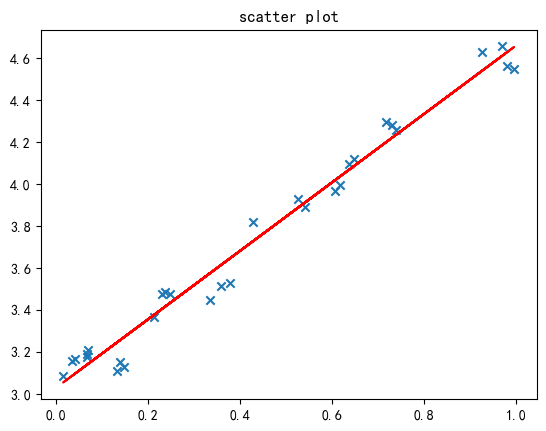

In [ ]:
#%%

# 使用sklearn包做线性回归(复杂例子)
import numpy as np
import matplotlib.pyplot as plt
# 需要插入scikit-learn包 pip install scikit-learn
from sklearn.linear_model import LinearRegression #导入机器学习库中的线性回归模块
from sklearn.linear_model import Ridge,RidgeCV   # Ridge岭回归,RidgeCV带有广义交叉验证的岭回归
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso回归,LassoCV交叉验证实现alpha的选取，LassoLarsCV基于最小角回归交叉验证实现alpha的选取  

#一元线性回归
# 样本数据集，第一列为x，第二列为y，在x和y之间建立回归模型
data=[
    [0.067732,3.176513],[0.427810,3.816464],[0.995731,4.550095],[0.738336,4.256571],[0.981083,4.560815],
    [0.526171,3.929515],[0.378887,3.526170],[0.033859,3.156393],[0.132791,3.110301],[0.138306,3.149813],
    [0.247809,3.476346],[0.648270,4.119688],[0.731209,4.282233],[0.236833,3.486582],[0.969788,4.655492],
    [0.607492,3.965162],[0.358622,3.514900],[0.147846,3.125947],[0.637820,4.094115],[0.230372,3.476039],
    [0.070237,3.210610],[0.067154,3.190612],[0.925577,4.631504],[0.717733,4.295890],[0.015371,3.085028],
    [0.335070,3.448080],[0.040486,3.167440],[0.212575,3.364266],[0.617218,3.993482],[0.541196,3.891471]
]
dataMat = np.array(data)
X = dataMat[:,0:1]   # 变量x
y = dataMat[:,1]   #变量y

# ========线性回归========
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
# model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) sklearn1.2以上版本已移除normalize参数
# ========岭回归========
# model = Ridge(alpha=0.5)
# model = RidgeCV(alphas=[0.1, 1.0, 10.0])  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
# ========Lasso回归========  
# model = Lasso(alpha=0.01)  # 调节alpha可以实现对拟合的程度  
# model = LassoCV()  # LassoCV自动调节alpha可以实现选择最佳的alpha。  
# model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha  

model.fit(X, y)   # 回归建模
print('系数矩阵:\n',model.coef_)
print('回归模型:\n',model)

predicted = model.predict(X)

# 绘制散点图 参数：x横轴 y纵轴
plt.scatter(X, y, marker='x')
plt.plot(X, predicted,c='r')
plt.title('scatter plot')
# 显示图形
plt.show()

In [ ]:
#%%

### 10.3 经济数据回归分析(投资与GPD及汇率的关系)
#############################################
import pandas as pd
import statsmodels.formula.api as smf

# 2023年各国投资与GDP和汇率的关系
print('投资与GDP和汇率的关系,回归分析')
# 数据下载请参考 ch3.4 使用wb获取经济数据
data5 = pd.read_csv("./data/WDdata_GDP_TZ_HL_2024.csv",encoding = "gbk")
mod = smf.ols('tz ~ np.log(gdp) + hl', data5).fit()
print(mod.summary())

投资与GDP和汇率的关系,回归分析
                            OLS Regression Results                            
Dep. Variable:                     tz   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     412.7
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.15e-37
Time:                        21:12:26   Log-Likelihood:                -2482.0
No. Observations:                  68   AIC:                             4970.
Df Residuals:                      65   BIC:                             4977.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -1.4e+16   2.16e+1

               .SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09


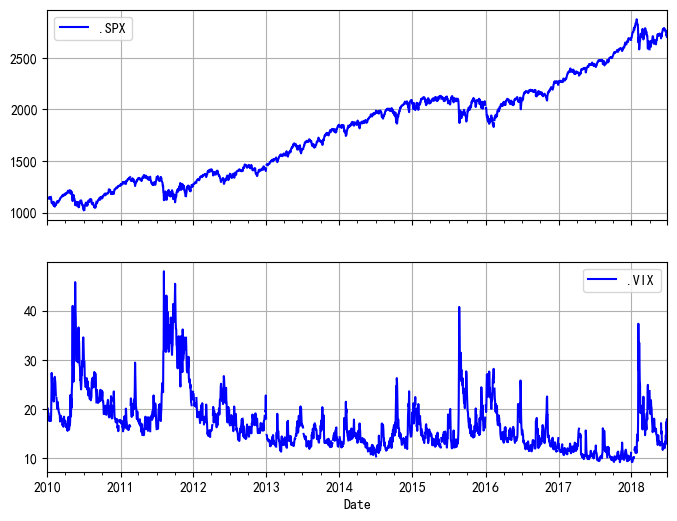

                .SPX      .VIX
Date                          
2010-01-01       NaN       NaN
2010-01-04       NaN       NaN
2010-01-05  0.003111 -0.035038
2010-01-06  0.000545 -0.009868
2010-01-07  0.003993 -0.005233


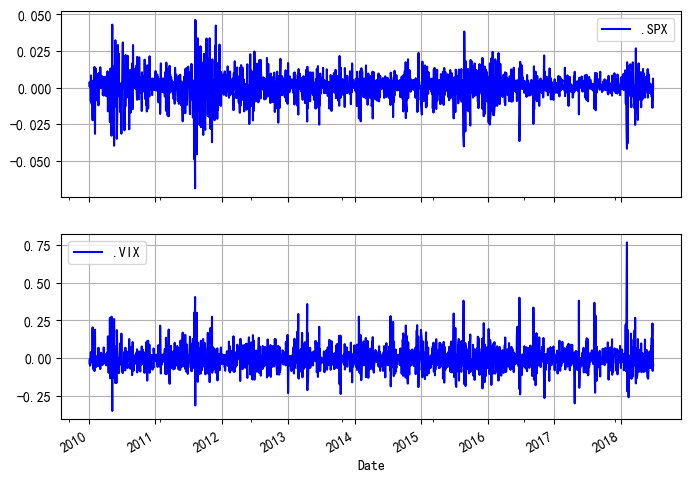

[-6.64051753e+00  1.44370407e-03]


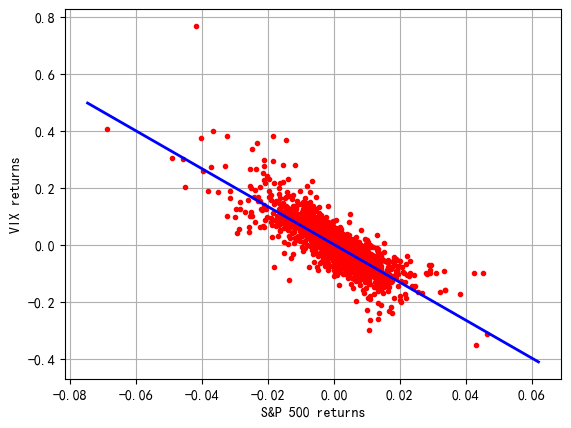

          .SPX      .VIX
.SPX  1.000000 -0.806532
.VIX -0.806532  1.000000


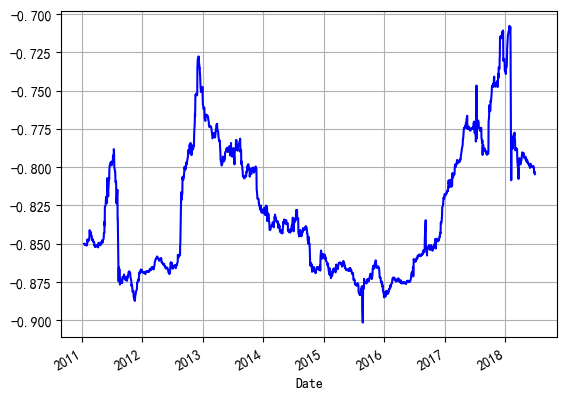

                            OLS Regression Results                            
Dep. Variable:                    vix   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3832.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:12:28   Log-Likelihood:                 3438.2
No. Observations:                2061   AIC:                            -6872.
Df Residuals:                    2059   BIC:                            -6861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      1.434      0.1

In [ ]:
#%%

### 10.4 金融数据回归分析(VIX和SPX之间的回归)
##########################################
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 使用教材上的例子数据
# data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
raw = pd.read_csv('./data/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
spx = pd.DataFrame(raw['.SPX'])
vix = pd.DataFrame(raw['.VIX'])
data4 = spx.join(vix)
print(data4.tail())
data4.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

rets = np.log(data4 / data4.shift(1)) 
print(rets.head())
rets.dropna(inplace=True)
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.show()

xdat = rets['.SPX'].values
ydat = rets['.VIX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
print(reg)
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('VIX returns')
plt.show()

print(rets.corr())
rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(grid=True, style='b')
plt.show()

#使用ols做回归
data4a=rets
data4a.columns = ['spx', 'vix']
mod4 = smf.ols('vix ~ spx', rets).fit()
print(mod4.summary())

In [ ]:
#%%

### 10.5 Fama-French因子模型应用(资产定价与股票回测)
################################################

'''
Fama-French 三因子模型，也称为 Fama-French 回归模型，是CAMP资本资产定价模型的升级版，后面还升级为了五因子模型。。
该模型是由 Eugene Fama 和 Kenneth French 于 1993 年提出来描述股票收益的, 是量化中最经典的模型之一，最早提出是在论文《Common risk factors in the returns on stocks and bonds》中。
具体三因子模型数学表述如下：
R = α + βm MKT + βs SMB + βh HML 
其中:SMB为规模因子，HML为价值因子（账面市值比因子），MKT为市场因子。
MKT 是市场的超额回报。这是在美国注册并在纽约证券交易所内，美国证券交易所或者纳斯达克上市的所有 CRSP 公司的价值加权回报减去一个月的国债收益率；
SMB（Small Minus Big）衡量市值较小的股票的超额回报，而不是市值较大的股票；
HML（High Minus Low）衡量价值股超过成长股的超额收益。价值股票的成交价格比（B/P）高于成长股。

Fama-French 5因子模型包含另外两个因素：
RMW（Robust Minus Weak）盈利能力因子，衡量营业利润率较高的公司的超额回报，而不是利润较低的公司；
CMA（Conservative Minus Aggressive）投资因子，衡量的是公司投资的超额回报低于哪些投资更能多的公司。

数据集：
Fama-French 系列因子数据集分为三因子、五因子等版本。适合用于验证因子对股票收益的解释力，国内适配版（商用）可通过金融研究平台获取，支持 Stata、Python 等工具读取。
以下为本人实测的两个可免费使用的数据源：

达特茅斯学院的五因子数据集通常指的是 Fama-French 五因子模型数据集。该数据集由达特茅斯学院 (https://home.dartmouth.edu) 塔克商学院的肯・弗伦奇（Ken French）教授提供，是金融领域用于资产定价研究的重要数据资源。
Fama-French 五因子模型在 1993 年提出的三因子模型基础上，于 2013 年进一步扩展而来，新增了投资因子 CMA 与盈利因子 RMW。达特茅斯学院的 Fama-French 五因子数据集可从Ken French 的个人网站获取。数据集包含市场因子（MKT）、规模因子（SMB）、价值因子（HML）、盈利能力因子（RMW）和投资因子（CMA）等数据。数据包为csv格式，提供1963年7月到2022年8月的数据，可供对比研究。
[https://link.wtturl.cn/?target=https%3A%2F%2Fmba.tuck.dartmouth.edu%2Fpages%2Ffaculty%2Fken.french%2Fftp%2FF-F_Research_Data_5_Factors_2x3_daily.CSV]

央财因子数据集：
中央财经大学金融学院的下载专区 可免费下载五因子数据（会定期更新，原始数据来源于国泰安数据库）。
[https://sf.cufe.edu.cn/kydt/kyjg/zgzcglyjzx/xzzq.htm]
变量名称说明:
trdyr trdwk trdmn trddy [交易日期]
mkt_rf [市场风险因子](rf是[无风险利率])
smb [规模风险因子]
hml [账面市值比风险因子]    
umd [惯性因子]
rmw [盈利能力因子](更高盈利能力的公司通常预示更健康的财务状况和更低的风险)
cma [投资模式因子](更保守的投资策略通常与较低的风险相关联)
rf [无风险利率]
smb_equal [（等权重）规模风险因子]
hml_equal [（等权重）账面市值比风险因子]
umd_equal [（等权重）惯性因子]
rmw_equal [(等权重）盈利能力因子]
cma_equal [（等权重）投资模式因子]
'''

# 导入所需的库
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf #导入统计模型包

In [ ]:
#%%

# 获取某支股票的日收益率

# # 以000630.SZ 铜陵有色为例
# from functions_stock import get_stock_data_ts
# stock_data = get_stock_data_ts('000630.SZ','20241001','20251031')
# outfile = './data/stockdata_000630sz_20241001-20251031.csv'
# stock_data.to_csv(outfile)
# print(stock_data.head())

# 从csv读取股票数据
stock=pd.read_csv('./data/stockdata_000630sz_20241001-20251031.csv',index_col=0, parse_dates=True)
# stock=stock.loc['2024-10-01':'2025-10-31',:]
# stock.index=pd.to_datetime(stock.index)

# 计算收益率，对数收益率
from functions_stock import daily_return_ratio, daily_return_ratio_log
# stock['returns'] = stock['close'].pct_change() 
# stock['log_returns'] = np.log(1 + stock['returns'])
# stock['log_returns'] = np.log(stock['close'] / stock['close'].shift(1))
stock['returns'] = daily_return_ratio(stock['Close'])
stock['log_returns'] = daily_return_ratio_log(stock['Close'])
# stock.dropna(inplace=True)
print(stock.head(3))
print(stock.tail(3))

            Close  High   Low  Open      Volume   returns  log_returns
Date                                                                  
2024-10-08   3.88  4.25  3.67  4.23  6870092.87       NaN          NaN
2024-10-09   3.51  3.77  3.49  3.77  4476082.81 -0.095361    -0.100219
2024-10-10   3.60  3.71  3.48  3.52  3151472.64  0.025641     0.025318
            Close  High   Low  Open      Volume   returns  log_returns
Date                                                                  
2025-10-29   5.54  5.54  5.30  5.37  4851526.38  0.051233     0.049964
2025-10-30   5.52  5.66  5.44  5.48  3924095.02 -0.003610    -0.003617
2025-10-31   5.29  5.53  5.27  5.47  3931207.31 -0.041667    -0.042560


In [ ]:
#%%

# 计算一些常用量化指标(可用于与三因子模型对比，参考)，并将结果存入stock_result字典

from functions_stock import sum_return_ratio, MaxDrawdown, sharpe_ratio, Information_Ratio, Treynor_Ratio

stock_result = {"name":"铜陵有色", "code":"000630.SZ"}

stock_result['sum_return_ratio'] = sum_return_ratio(stock['Close'])
stock_result['MaxDrawdown'] = MaxDrawdown(stock['Close'])
stock_result['sharpe_ratio'] = sharpe_ratio(stock['Close'])
stock_result['Information_Ratio'] = Information_Ratio(stock['Close'])
stock_result['Treynor_Ratio'] = Treynor_Ratio(stock['Close'],beta=1)

print(stock_result)

{'name': '铜陵有色', 'code': '000630.SZ', 'sum_return_ratio': np.float64(0.36340206185567014), 'MaxDrawdown': np.float64(0.23969072164948446), 'sharpe_ratio': np.float64(-0.00018606714130563022), 'Information_Ratio': np.float64(14.270386513326411), 'Treynor_Ratio': np.float64(0.0014494127877521805)}


In [ ]:
#%%

# 使用因子数据做回归分析(OLS)

# 读取因子数据
three_factors=pd.read_csv('./data/F-F_5_Factors_daily_CUFE.csv')[['trddy','mkt_rf','smb','hml','rmw','cma']].rename(columns={'trddy':'Date'}).set_index('Date')
three_factors=three_factors.loc['2024-10-01':'2025-10-31',:]
three_factors.index=pd.to_datetime(three_factors.index)
print(three_factors.head())
print(three_factors.tail())

# 合并股票数据与因子数据
rets = pd.merge(stock[['returns','log_returns']], three_factors, left_index=True, right_index=True)
rets.dropna(inplace=True)

# 使用五因子做回归分析
mod4 = smf.ols('returns ~ mkt_rf + smb + hml + rmw + cma', rets).fit(cov_type="HAC", cov_kwds={"maxlags": 3})
# mod4 = smf.ols('log_returns ~ mkt_rf + smb + hml + rmw + cma', rets).fit(cov_type="HAC", cov_kwds={"maxlags": 3})

# 思考，使用简单收益率与使用对数收益率的区别及适用的场景？
# 简单收益率：直接计算日收益率，不考虑时间衰减。适用于短期分析，如计算策略的日收益率。
# 对数收益率：计算日收益率的自然对数，考虑时间衰减。适用于长期分析，如计算策略的年化收益率。
print(mod4.summary())

# 将回归结果中的系数存入stock_result字典
betas = mod4.params
stock_result['alpha'] = betas['Intercept']
stock_result['mkt'] = betas['mkt_rf']
stock_result['smb'] = betas['smb']
stock_result['hml'] = betas['hml'] 
stock_result['rmw'] = betas['rmw']
stock_result['cma'] = betas['cma']

# 输出结果
print(stock_result)
print("\n结果汇总如下：")
for k,v in stock_result.items():
    if isinstance(v, (float, np.floating)):
        print(f'{k:18} : {v:.4f}')
    else:
        print(f'{k:18} : {v}')    

              mkt_rf       smb       hml       rmw       cma
Date                                                        
2024-10-08  0.052454  0.020356 -0.041206 -0.011257 -0.007186
2024-10-09 -0.077365 -0.018055  0.005491  0.000599 -0.001939
2024-10-10  0.010232 -0.006675  0.017603  0.013279 -0.002826
2024-10-11 -0.032238 -0.001459  0.011822  0.001064  0.002802
2024-10-14  0.022142  0.011602 -0.006742 -0.009298  0.009181
              mkt_rf       smb       hml       rmw       cma
Date                                                        
2025-10-27  0.012733 -0.007324 -0.001615  0.006615 -0.010515
2025-10-28 -0.002817  0.007641 -0.003815 -0.007379  0.003007
2025-10-29  0.013031 -0.018816  0.000856  0.007014 -0.011723
2025-10-30 -0.008982 -0.002663  0.007209 -0.004074  0.005502
2025-10-31 -0.005584  0.020695  0.001694 -0.018548  0.023782
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                 

In [ ]:
#%%

# 多支股票的F-F因子回归

# 详细请参考 proc_FF_reg.py 文件
from functions_ffreg import analyze
code_name={
            "600100.SH": "同方股份",
            "600626.SH": "申达股份",
            "000630.SZ": "铜陵有色",
            "000850.SZ": "华茂股份",
            "600368.SH": "五洲交通",
            "603766.SH": "隆鑫通用",
            "600105.SH": "永鼎股份",
            "600603.SH": "广汇物流",
            "002344.SZ": "海宁皮城",
            "000407.SZ": "胜利股份",
            "000883.SZ": "湖北能源"
            }
r_ = analyze(
    codes=code_name,
    start_date='2024-10-01', end_date='2025-10-31', 
    mode=5)
# print(r_)
outfile = './data/FFReg_2025.csv'
r_.to_csv(outfile)
print(f'\n结果已保存至{outfile}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'股票代码': '600100.SH', '实际总收益率': np.float64(0.24746744948010257), '最大回测率': np.float64(0.2848100699160002), '夏普比率': np.float64(-0.00034106000418986505), '信息比率': np.float64(8.765935301527115), '特雷诺比率': np.float64(0.0011615025450098357), '阿尔法(alpha)': np.float64(0.00019020417381214157), '市场因子MKT': np.float64(0.8564011476019929), '规模因子SMB': np.float64(-0.9408006071552661), '价值因子HML': np.float64(-0.7968552075621144), '盈利能力因子RMW': np.float64(-2.137994102963374), '投资模式因子CMA': np.float64(-0.43378538858669224), '股票名称': '同方股份'}
股票同方股份(600100.SH)处理完成:{'股票代码': '600100.SH', '实际总收益率': np.float64(0.24746744948010257), '最大回测率': np.float64(0.2848100699160002), '夏普比率': np.float64(-0.00034106000418986505), '信息比率': np.float64(8.765935301527115), '特雷诺比率': np.float64(0.0011615025450098357), '阿尔法(alpha)': np.float64(0.00019020417381214157), '市场因子MKT': np.float64(0.8564011476019929), '规模因子SMB': np.float64(-0.9408006071552661), '价值因子HML': np.float64(-0.7968552075621144), '盈利能力因子RMW': np.float64(-2.1379941029633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'股票代码': '600626.SH', '实际总收益率': np.float64(0.34848487402708966), '最大回测率': np.float64(0.3479166687362723), '夏普比率': np.float64(0.0003337044187682271), '信息比率': np.float64(10.66244291034027), '特雷诺比率': np.float64(0.0016013588714199724), '阿尔法(alpha)': np.float64(0.0008604560710868244), '市场因子MKT': np.float64(1.0379926653021418), '规模因子SMB': np.float64(0.9456669886668582), '价值因子HML': np.float64(0.09291845911282312), '盈利能力因子RMW': np.float64(0.3902500408212312), '投资模式因子CMA': np.float64(1.1481631565093111), '股票名称': '申达股份'}
股票申达股份(600626.SH)处理完成:{'股票代码': '600626.SH', '实际总收益率': np.float64(0.34848487402708966), '最大回测率': np.float64(0.3479166687362723), '夏普比率': np.float64(0.0003337044187682271), '信息比率': np.float64(10.66244291034027), '特雷诺比率': np.float64(0.0016013588714199724), '阿尔法(alpha)': np.float64(0.0008604560710868244), '市场因子MKT': np.float64(1.0379926653021418), '规模因子SMB': np.float64(0.9456669886668582), '价值因子HML': np.float64(0.09291845911282312), '盈利能力因子RMW': np.float64(0.3902500408212312), '投资模式

[*********************100%***********************]  1 of 1 completed


{'股票代码': '600368.SH', '实际总收益率': np.float64(0.10967738240572472), '最大回测率': np.float64(0.268421003589338), '夏普比率': np.float64(-0.0009686557613894143), '信息比率': np.float64(3.857855292753973), '特雷诺比率': np.float64(0.0006591196861494494), '阿尔法(alpha)': np.float64(0.0003151262205058065), '市场因子MKT': np.float64(0.8258497128933432), '规模因子SMB': np.float64(-0.27211934236520996), '价值因子HML': np.float64(0.8601251197715424), '盈利能力因子RMW': np.float64(-0.4242669313845795), '投资模式因子CMA': np.float64(0.11357298579932248), '股票名称': '五洲交通'}
股票五洲交通(600368.SH)处理完成:{'股票代码': '600368.SH', '实际总收益率': np.float64(0.10967738240572472), '最大回测率': np.float64(0.268421003589338), '夏普比率': np.float64(-0.0009686557613894143), '信息比率': np.float64(3.857855292753973), '特雷诺比率': np.float64(0.0006591196861494494), '阿尔法(alpha)': np.float64(0.0003151262205058065), '市场因子MKT': np.float64(0.8258497128933432), '规模因子SMB': np.float64(-0.27211934236520996), '价值因子HML': np.float64(0.8601251197715424), '盈利能力因子RMW': np.float64(-0.4242669313845795), 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'股票代码': '603766.SH', '实际总收益率': np.float64(0.6463096567926618), '最大回测率': np.float64(0.18596792111694044), '夏普比率': np.float64(0.0008429814492898016), '信息比率': np.float64(22.66102171820337), '特雷诺比率': np.float64(0.0022710227657952472), '阿尔法(alpha)': np.float64(0.0008745714620179963), '市场因子MKT': np.float64(0.9019105549484752), '规模因子SMB': np.float64(0.39494367407833153), '价值因子HML': np.float64(0.15990717440957916), '盈利能力因子RMW': np.float64(-0.5627797443230657), '投资模式因子CMA': np.float64(-1.360654397839203), '股票名称': '隆鑫通用'}
股票隆鑫通用(603766.SH)处理完成:{'股票代码': '603766.SH', '实际总收益率': np.float64(0.6463096567926618), '最大回测率': np.float64(0.18596792111694044), '夏普比率': np.float64(0.0008429814492898016), '信息比率': np.float64(22.66102171820337), '特雷诺比率': np.float64(0.0022710227657952472), '阿尔法(alpha)': np.float64(0.0008745714620179963), '市场因子MKT': np.float64(0.9019105549484752), '规模因子SMB': np.float64(0.39494367407833153), '价值因子HML': np.float64(0.15990717440957916), '盈利能力因子RMW': np.float64(-0.5627797443230657), '

[*********************100%***********************]  1 of 1 completed


{'股票代码': '002344.SZ', '实际总收益率': np.float64(0.15022608100644103), '最大回测率': np.float64(0.4318181818181818), '夏普比率': np.float64(-0.0005611752488713176), '信息比率': np.float64(4.898502048928933), '特雷诺比率': np.float64(0.0008810077798836577), '阿尔法(alpha)': np.float64(-0.00037815611158204687), '市场因子MKT': np.float64(1.0881272561818995), '规模因子SMB': np.float64(0.7762711959285413), '价值因子HML': np.float64(1.225127382226504), '盈利能力因子RMW': np.float64(-0.38084946306295325), '投资模式因子CMA': np.float64(-0.33205996597096277), '股票名称': '海宁皮城'}
股票海宁皮城(002344.SZ)处理完成:{'股票代码': '002344.SZ', '实际总收益率': np.float64(0.15022608100644103), '最大回测率': np.float64(0.4318181818181818), '夏普比率': np.float64(-0.0005611752488713176), '信息比率': np.float64(4.898502048928933), '特雷诺比率': np.float64(0.0008810077798836577), '阿尔法(alpha)': np.float64(-0.00037815611158204687), '市场因子MKT': np.float64(1.0881272561818995), '规模因子SMB': np.float64(0.7762711959285413), '价值因子HML': np.float64(1.225127382226504), '盈利能力因子RMW': np.float64(-0.38084946306295325

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'股票代码': '000407.SZ', '实际总收益率': np.float64(0.13902914395806162), '最大回测率': np.float64(0.2390746046853822), '夏普比率': np.float64(-0.0014219558878751648), '信息比率': np.float64(6.403111061457937), '特雷诺比率': np.float64(0.0006509303300698813), '阿尔法(alpha)': np.float64(-0.00027954323224182586), '市场因子MKT': np.float64(1.0577593142470414), '规模因子SMB': np.float64(0.8734843494037345), '价值因子HML': np.float64(1.08409241544845), '盈利能力因子RMW': np.float64(0.2798513283927813), '投资模式因子CMA': np.float64(0.1109104316411271), '股票名称': '胜利股份'}
股票胜利股份(000407.SZ)处理完成:{'股票代码': '000407.SZ', '实际总收益率': np.float64(0.13902914395806162), '最大回测率': np.float64(0.2390746046853822), '夏普比率': np.float64(-0.0014219558878751648), '信息比率': np.float64(6.403111061457937), '特雷诺比率': np.float64(0.0006509303300698813), '阿尔法(alpha)': np.float64(-0.00027954323224182586), '市场因子MKT': np.float64(1.0577593142470414), '规模因子SMB': np.float64(0.8734843494037345), '价值因子HML': np.float64(1.08409241544845), '盈利能力因子RMW': np.float64(0.2798513283927813), '投资模式

In [ ]:
#%%

#############END################